In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
activity_codes_mapping = {'A': 'walking',
                          'B': 'jogging',
                          'C': 'stairs',
                          'D': 'sitting',
                          'E': 'standing',
                          'F': 'typing',
                          'G': 'brushing teeth',
                          'H': 'eating soup',
                          'I': 'eating chips',
                          'J': 'eating pasta',
                          'K': 'drinking from cup',
                          'L': 'eating sandwich',
                          'M': 'kicking soccer ball',
                          'O': 'playing catch tennis ball',
                          'P': 'dribbling basket ball',
                          'Q': 'writing',
                          'R': 'clapping',
                          'S': 'folding clothes'}
activity_color_map = {activity_codes_mapping['A']: 'lime',
                      activity_codes_mapping['B']: 'red',
                      activity_codes_mapping['C']: 'blue',
                      activity_codes_mapping['D']: 'orange',
                      activity_codes_mapping['E']: 'yellow',
                      activity_codes_mapping['F']: 'lightgreen',
                      activity_codes_mapping['G']: 'greenyellow',
                      activity_codes_mapping['H']: 'magenta',
                      activity_codes_mapping['I']: 'gold',
                      activity_codes_mapping['J']: 'cyan',
                      activity_codes_mapping['K']: 'purple',
                      activity_codes_mapping['L']: 'lightgreen',
                      activity_codes_mapping['M']: 'violet',
                      activity_codes_mapping['O']: 'limegreen',
                      activity_codes_mapping['P']: 'deepskyblue',   
                      activity_codes_mapping['Q']: 'mediumspringgreen',
                      activity_codes_mapping['R']: 'plum',
                      activity_codes_mapping['S']: 'olive'}
                   
                          

In [3]:
def show_accel_per_activity(device, df, act, interval_in_sec = None):
  ''' Plots acceleration time history per activity '''

  df1 = df.loc[df.activity == act].copy()
  df1.reset_index(drop = True, inplace = True)

  df1['duration'] = (df1['timestamp'] - df1['timestamp'].iloc[0])/1000000000 

  if interval_in_sec == None:
    ax = df1[:].plot(kind='line', x='duration', y=['x','y','z'], figsize=(25,7), grid = True) 
  else:
    ax = df1[:interval_in_sec*20].plot(kind='line', x='duration', y=['x','y','z'], figsize=(25,7), grid = True)

  ax.set_xlabel('duration  (sec)', fontsize = 15)
  ax.set_ylabel('acceleration  (m/sec^2)',fontsize = 15)
  ax.set_title('Acceleration:   Device: ' + device + '      Activity:  ' + act, fontsize = 15)

In [4]:
def show_ang_velocity_per_activity(device, df, act, interval_in_sec = None):
  ''' Plots angular volocity time history per activity '''

  df1 = df.loc[df.activity == act].copy()
  df1.reset_index(drop = True, inplace = True)

  df1['duration'] = (df1['timestamp'] - df1['timestamp'].iloc[0])/1000000000 
  if interval_in_sec == None:
    ax = df1[:].plot(kind='line', x='duration', y=['x','y','z'], figsize=(25,7), grid = True) 
  else:
    ax = df1[:interval_in_sec*20].plot(kind='line', x='duration', y=['x','y','z'], figsize=(25,7), grid = True)

  ax.set_xlabel('duration  (sec)', fontsize = 15)
  ax.set_ylabel('angular velocity  (rad/sec)',fontsize = 15)
  ax.set_title('Angular velocity:  Device: ' + device + '      Activity:  ' + act, fontsize = 15)

In [5]:
raw_par_10_watch_accel = pd.read_csv('data_1604_accel_watch.txt', names = ['participant_id' , 'activity_code' , 'timestamp', 'x', 'y', 'z'], index_col=None, header=None)

raw_par_10_watch_accel.z = raw_par_10_watch_accel.z.str.strip(';')
raw_par_10_watch_accel.z = pd.to_numeric(raw_par_10_watch_accel.z)

raw_par_10_watch_accel['activity'] = raw_par_10_watch_accel['activity_code'].map(activity_codes_mapping)

raw_par_10_watch_accel = raw_par_10_watch_accel[['participant_id', 'activity_code', 'activity', 'timestamp', 'x', 'y', 'z']]

raw_par_10_watch_accel

participant_id activity_code         activity        timestamp  \
0                1604             A          walking  696459231597344   
1                1604             A          walking  696459281097344   
2                1604             A          walking  696459330597344   
3                1604             A          walking  696459380097344   
4                1604             A          walking  696459429597344   
...               ...           ...              ...              ...   
64899            1604             S  folding clothes  696163001244134   
64900            1604             S  folding clothes  696163051167774   
64901            1604             S  folding clothes  696163101091414   
64902            1604             S  folding clothes  696163151015054   
64903            1604             S  folding clothes  696163200938694   

              x          y          z  
0      3.478326  -2.366220  -4.017470  
1      0.485574  -4.932804  -3.217807  
2      1.404948  -1.219397   0.806846  
3      6.274754 -11.796980   0.768539  
4      4.505439  -5.782745   1.776498  
...         ...        ...        ...  
64899  6.643461  -0.333542   3.440468  
64900  8.180538  -2.035820   7.426814  
64901  7.902811  -1.219397   8.597578  
64902  8.788666  -4.145112  10.084377  
64903  7.385663  -4.145112   8.724471  

[64904 rows x 7 columns]

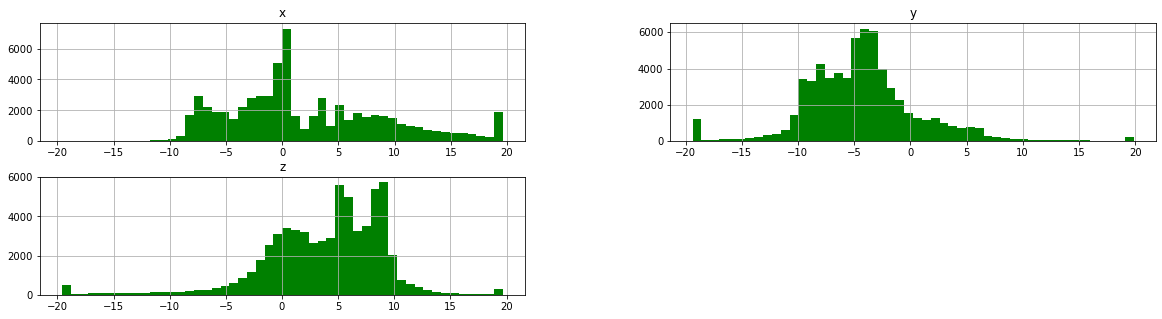

In [6]:

T = raw_par_10_watch_accel
_ = T[['x', 'y', 'z']].hist(bins = 50, figsize = (20, 5), color='green')


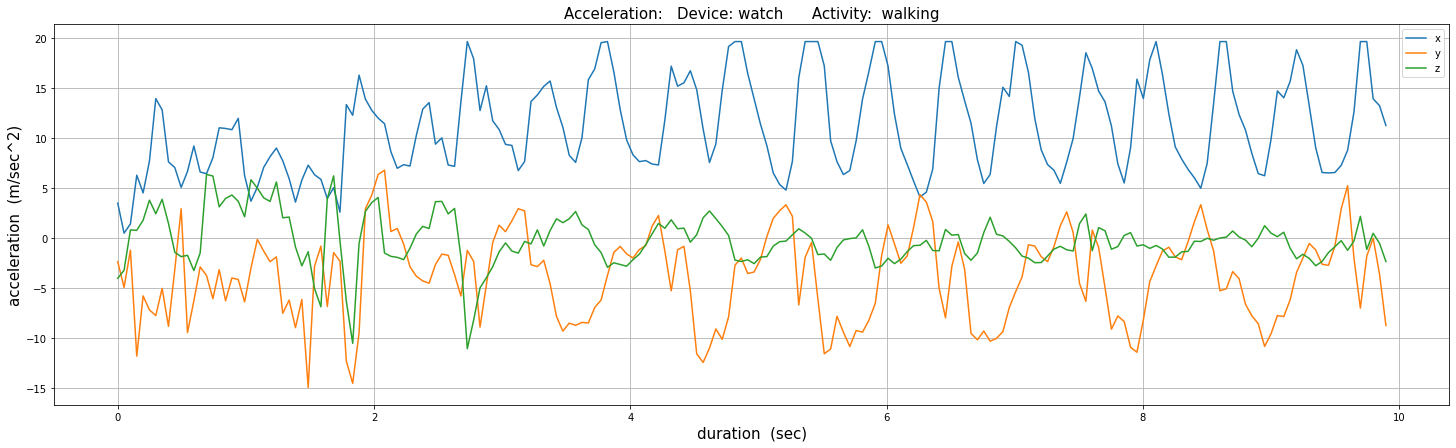

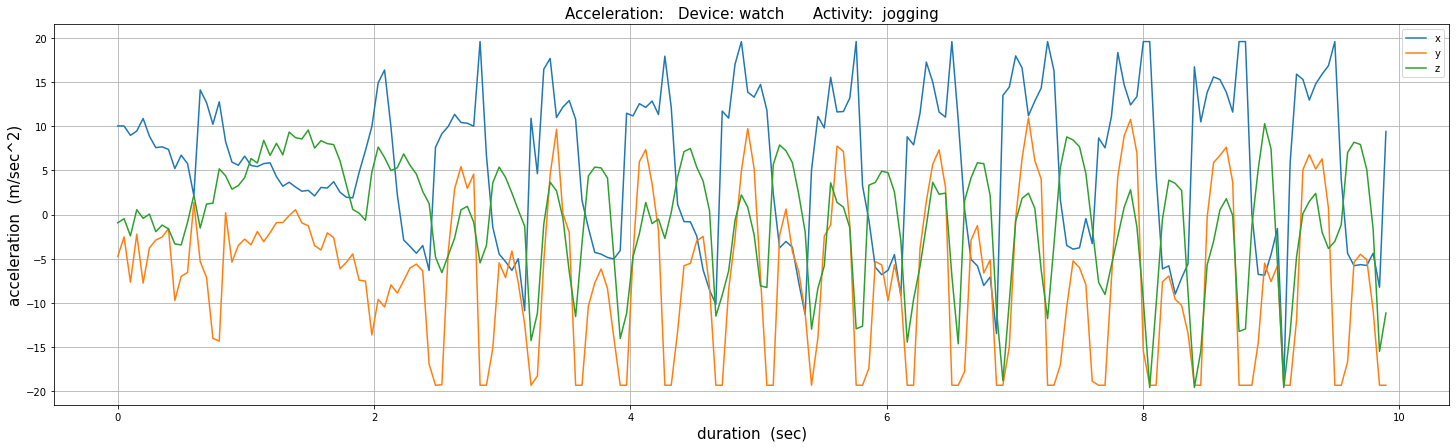

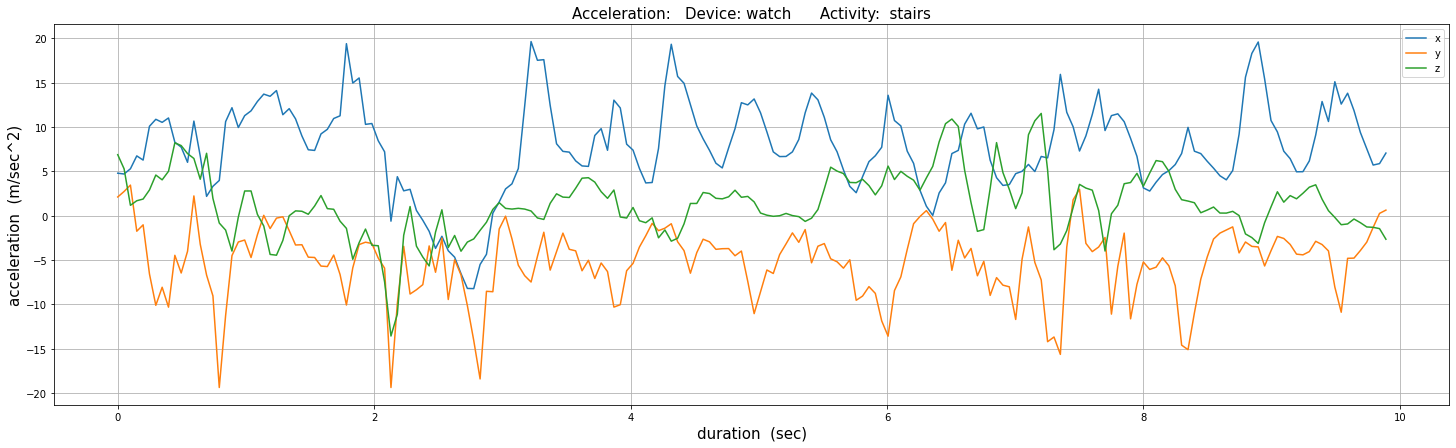

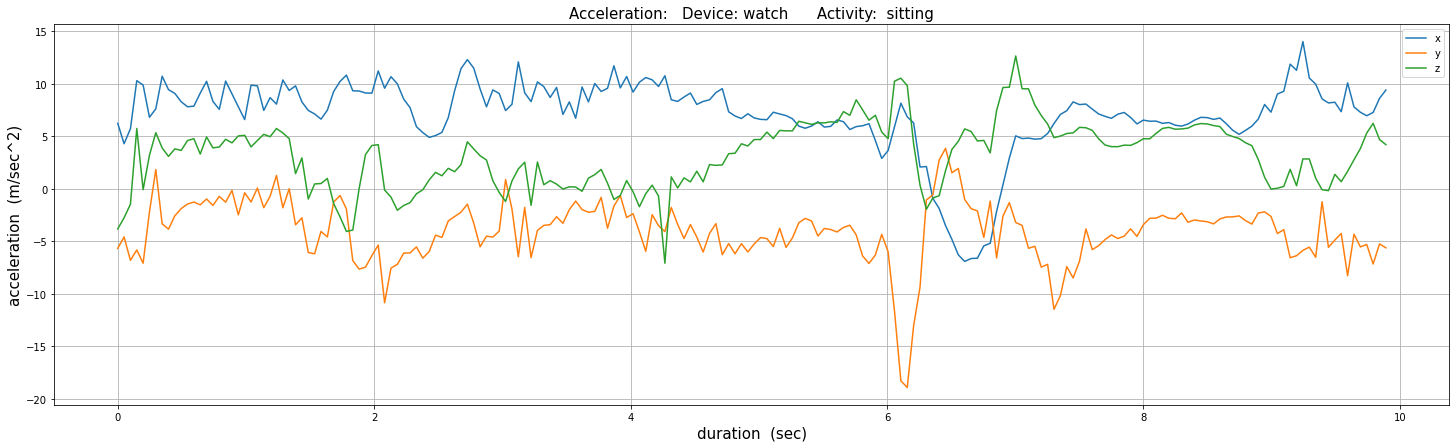

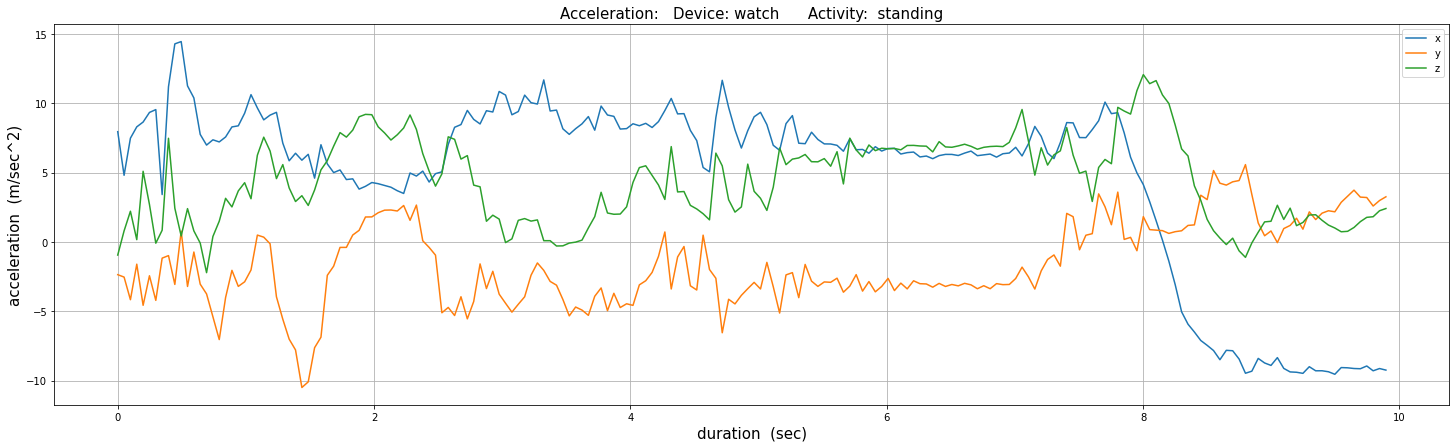

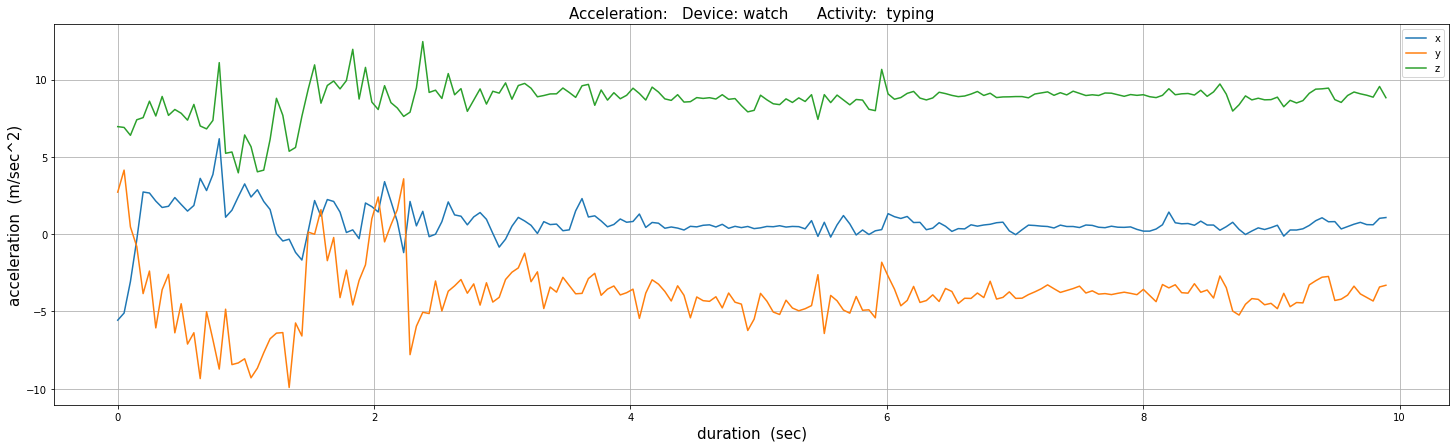

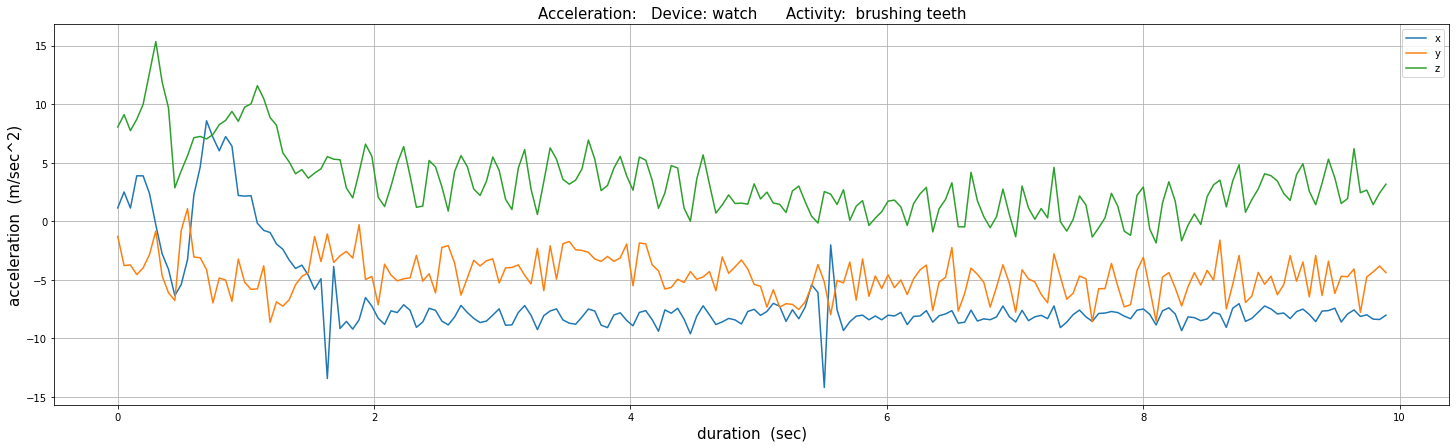

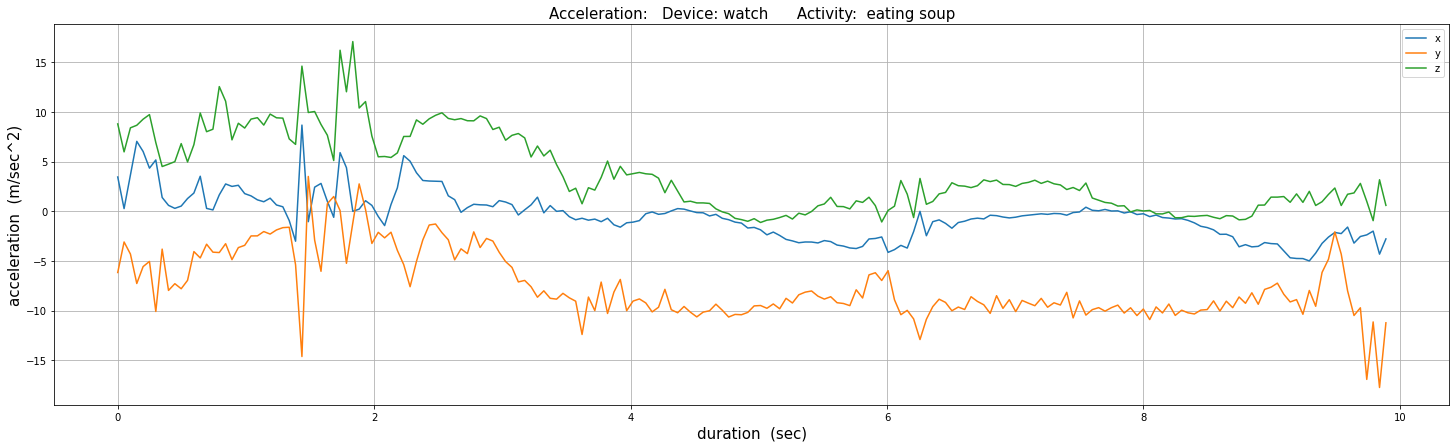

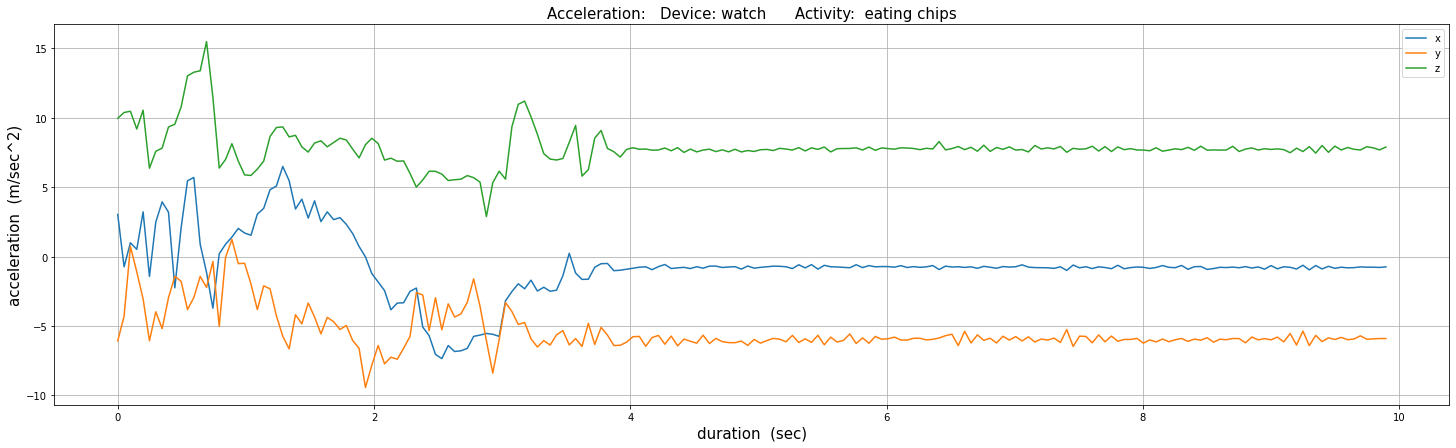

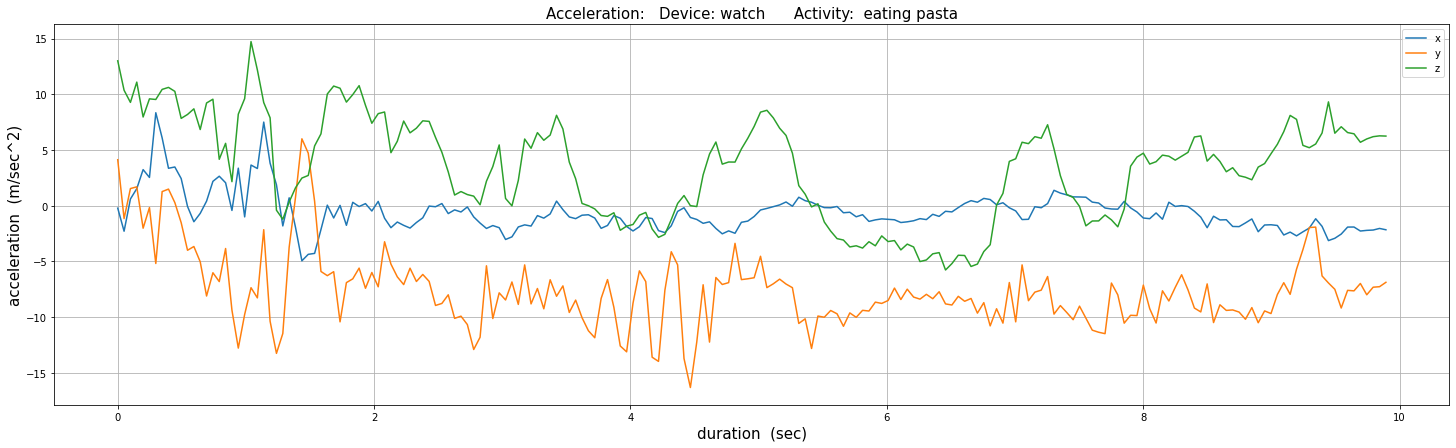

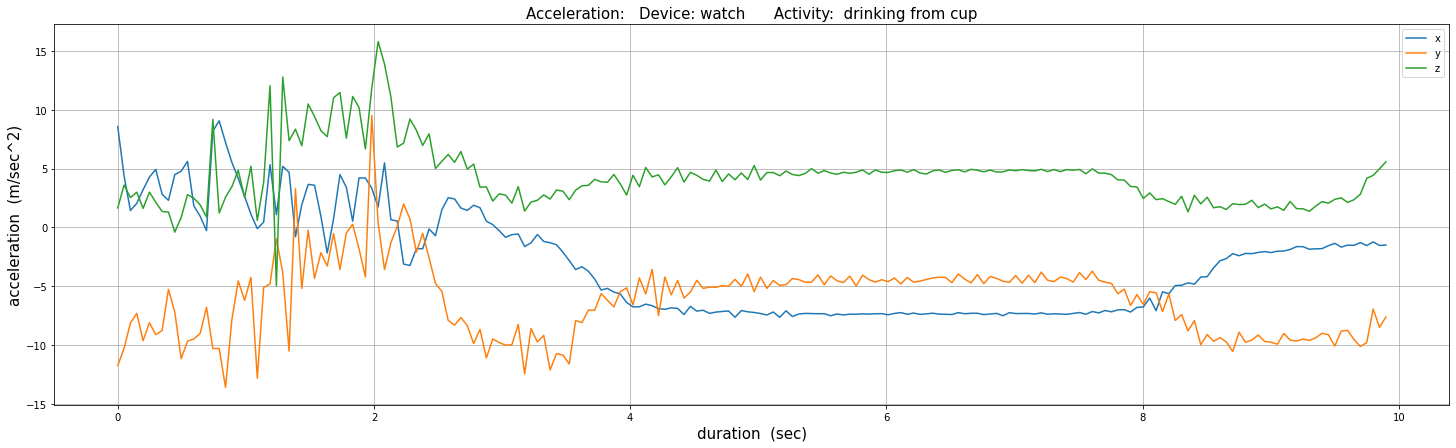

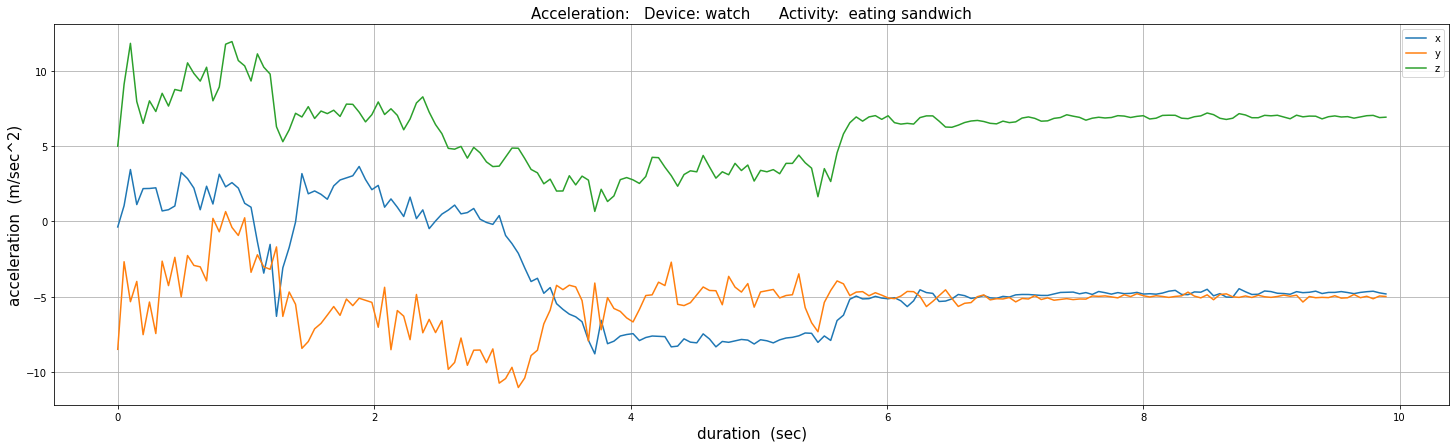

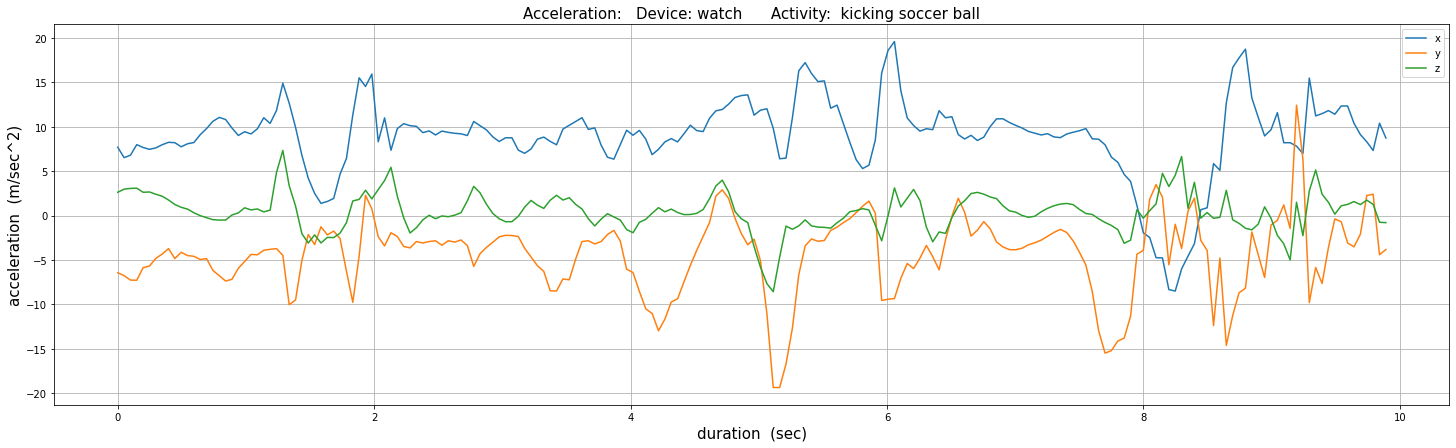

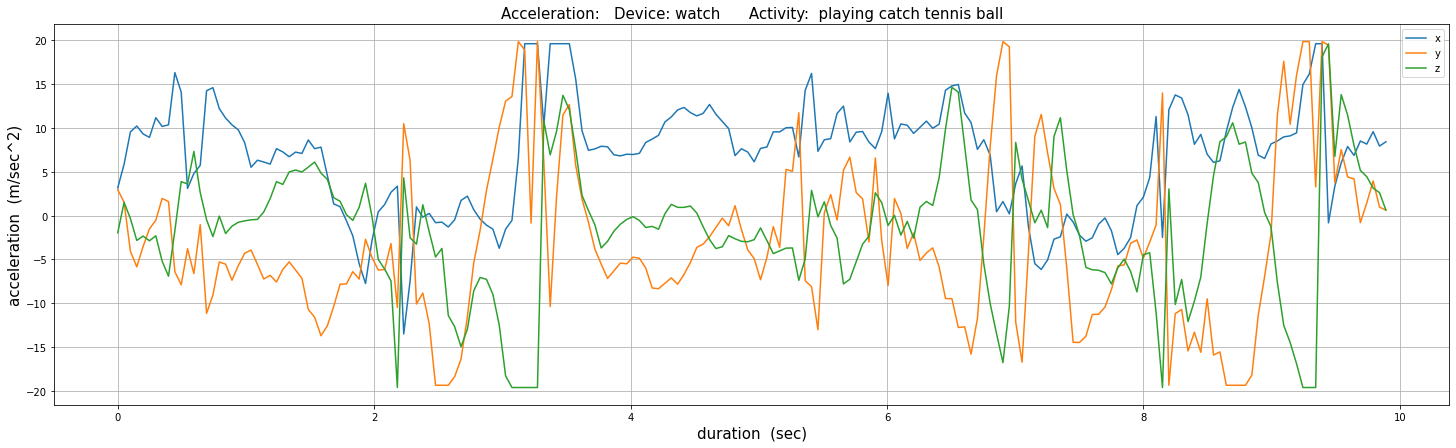

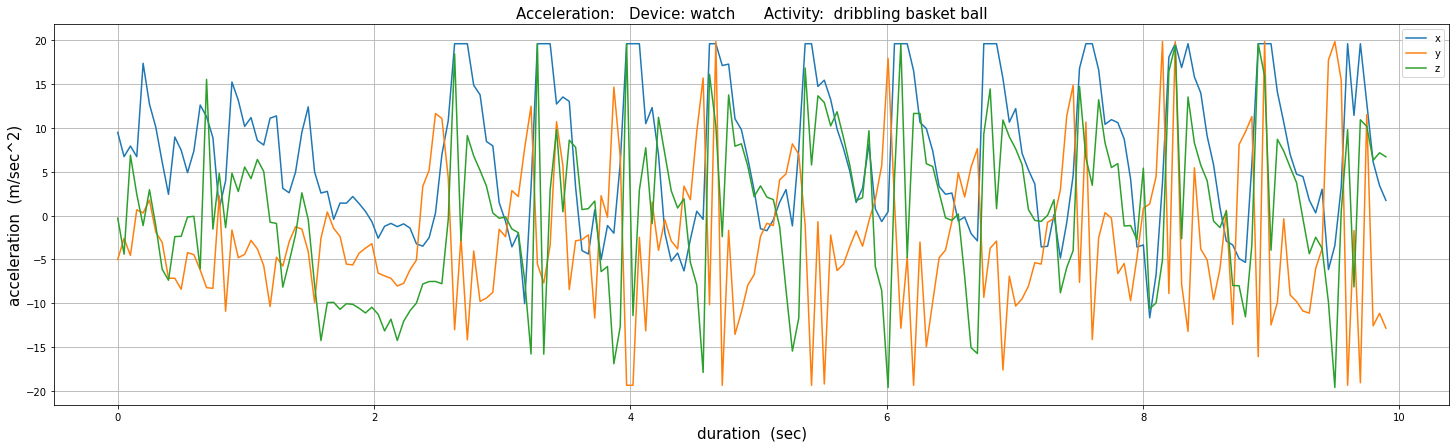

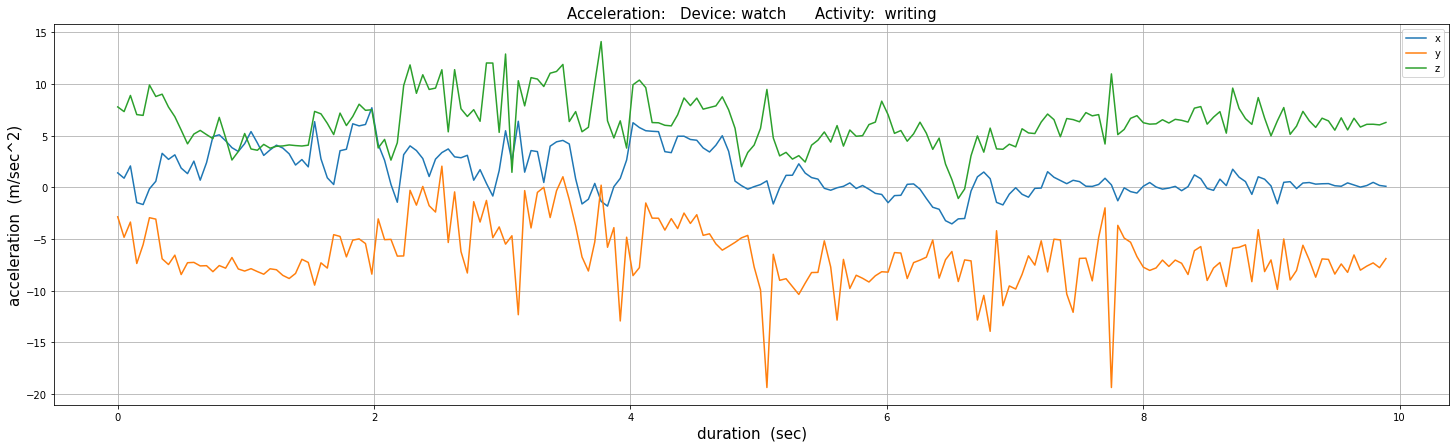

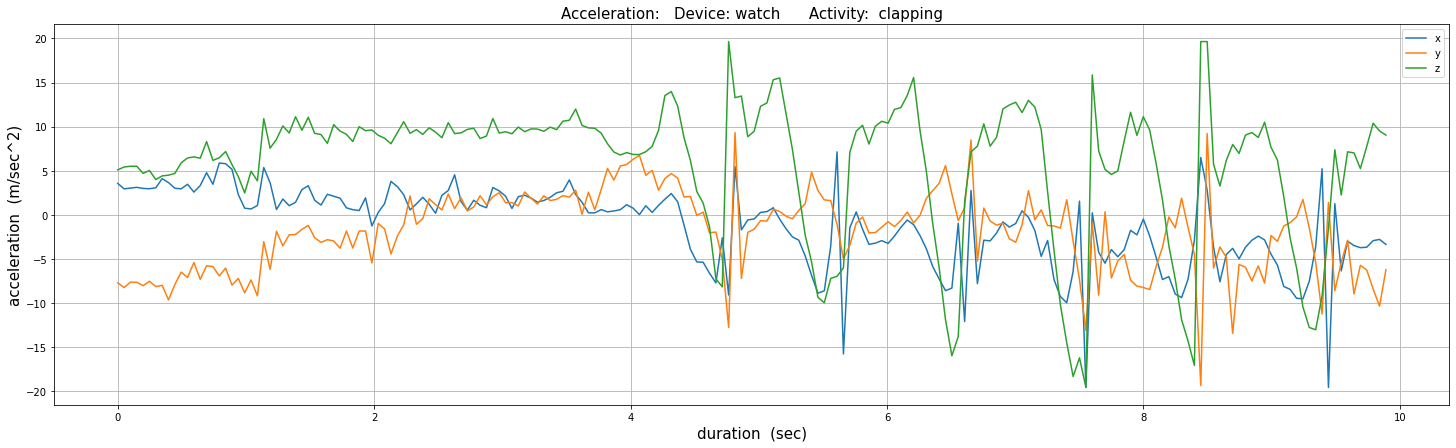

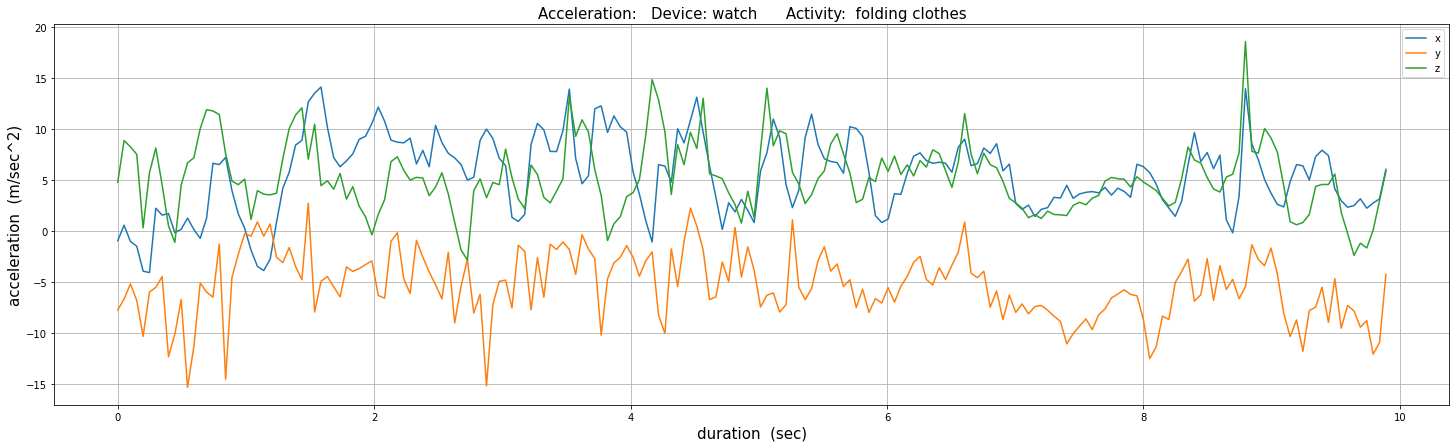

In [7]:
for key in activity_codes_mapping:
  show_accel_per_activity('watch', raw_par_10_watch_accel, activity_codes_mapping[key], 10)

In [8]:
raw_par_35_watch_ang_vel = pd.read_csv('data_1604_gyro_watch.txt', names = ['participant_id' , 'activity_code' , 'timestamp', 'x', 'y', 'z'], index_col=None, header=None)

raw_par_35_watch_ang_vel.z = raw_par_35_watch_ang_vel.z.str.strip(';')
raw_par_35_watch_ang_vel.z = pd.to_numeric(raw_par_35_watch_ang_vel.z)

raw_par_35_watch_ang_vel['activity'] = raw_par_35_watch_ang_vel['activity_code'].map(activity_codes_mapping)

raw_par_35_watch_ang_vel = raw_par_35_watch_ang_vel[['participant_id', 'activity_code', 'activity', 'timestamp', 'x', 'y', 'z']]

raw_par_35_watch_ang_vel

participant_id activity_code         activity        timestamp  \
0                1604             A          walking  696459281097344   
1                1604             A          walking  696459330597344   
2                1604             A          walking  696459380097344   
3                1604             A          walking  696459429597344   
4                1604             A          walking  696459479097344   
...               ...           ...              ...              ...   
64865            1604             S  folding clothes  696162951320494   
64866            1604             S  folding clothes  696163001244134   
64867            1604             S  folding clothes  696163051167774   
64868            1604             S  folding clothes  696163101091414   
64869            1604             S  folding clothes  696163151015054   

              x         y         z  
0      1.947164  0.964727  0.675196  
1      2.941056  1.505881  0.223524  
2      2.411619  0.384158  0.672000  
3      3.061431  1.237435  1.142847  
4      1.924794  0.122103  0.593171  
...         ...       ...       ...  
64865  0.310668  0.663422  0.286358  
64866  1.155422 -0.198377 -0.010851  
64867  1.275797  0.539851  0.401407  
64868  0.163661  0.234120  0.454670  
64869 -0.464845  0.926542  0.722051  

[64870 rows x 7 columns]

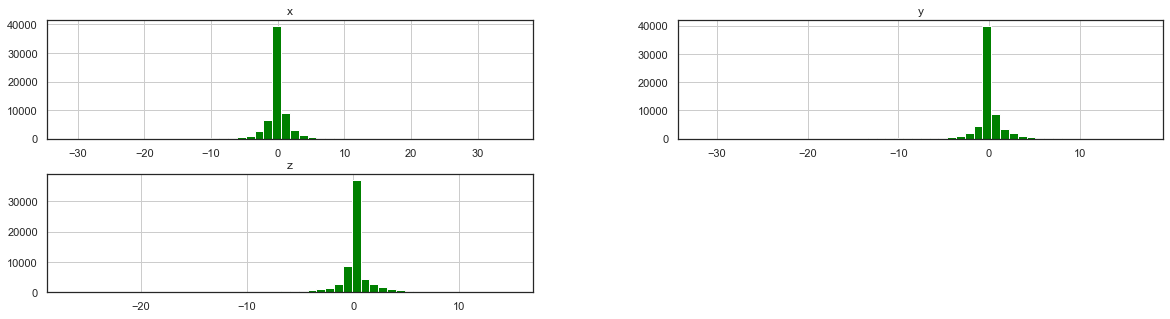

In [161]:
T = raw_par_35_watch_ang_vel
_ = T[['x', 'y', 'z']].hist(bins = 50, figsize = (20, 5), color='green')


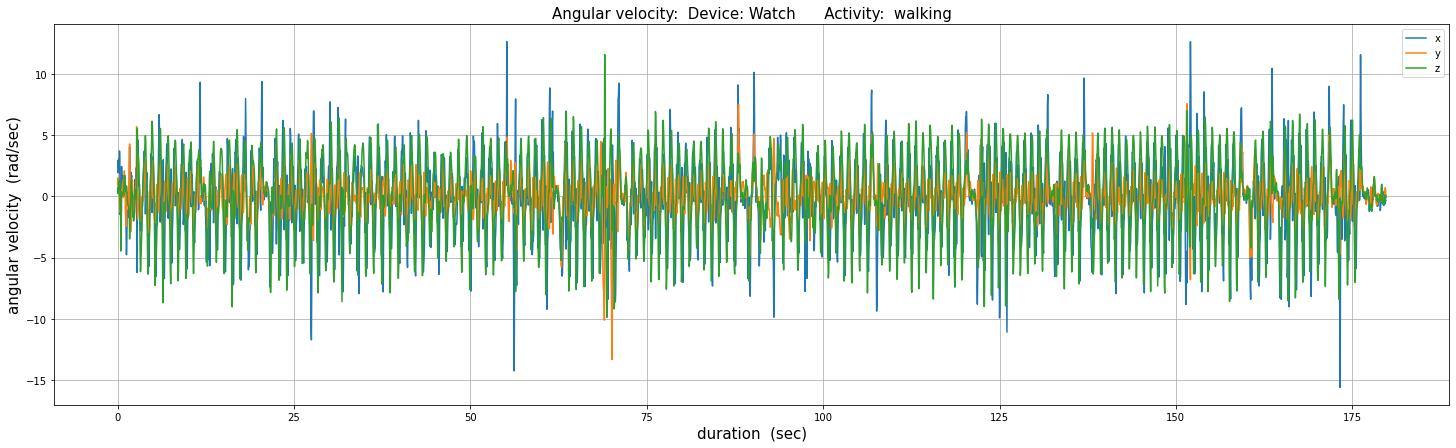

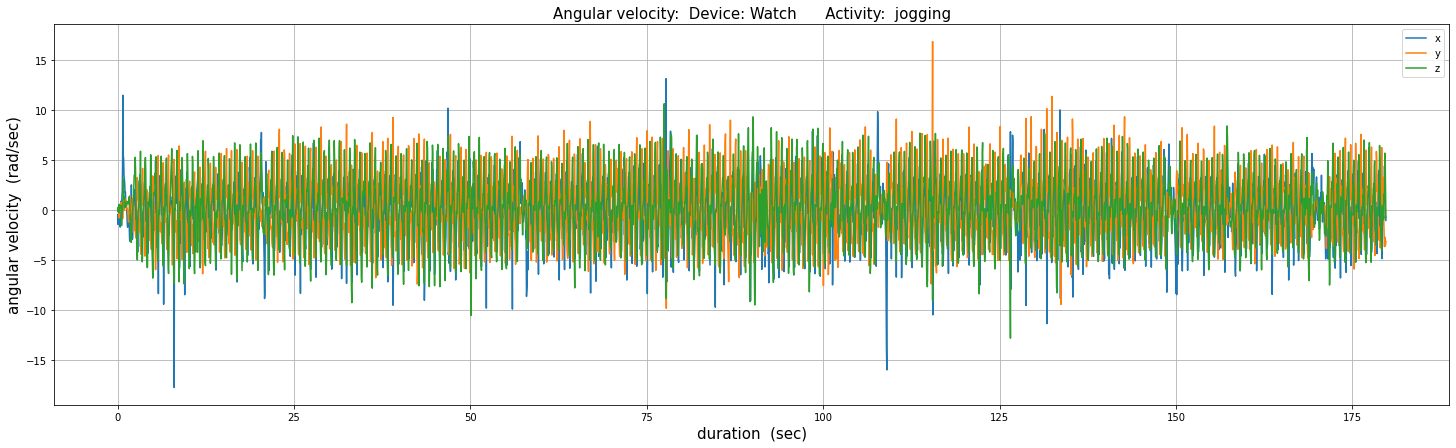

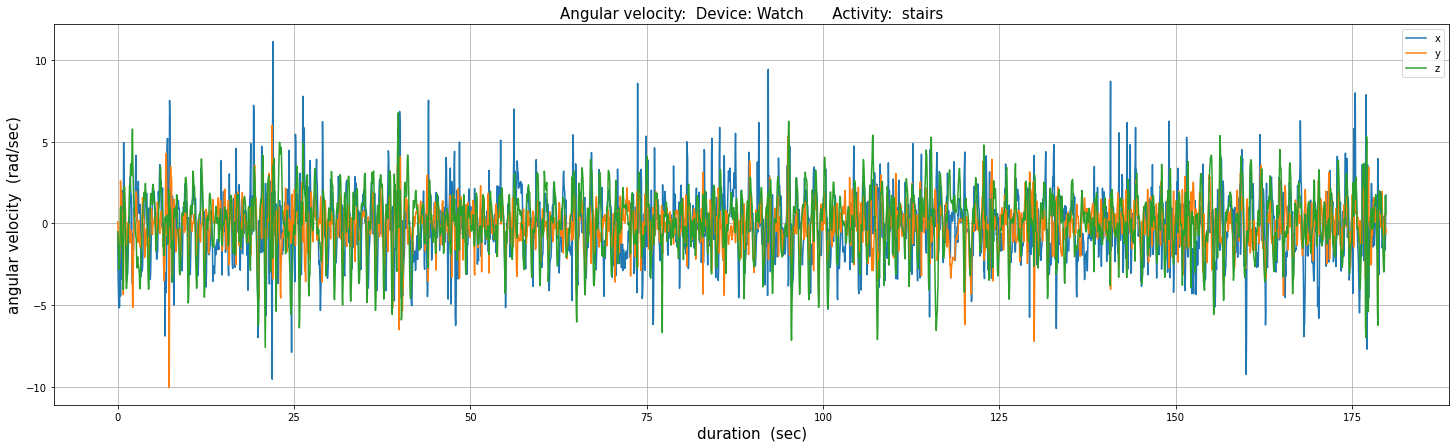

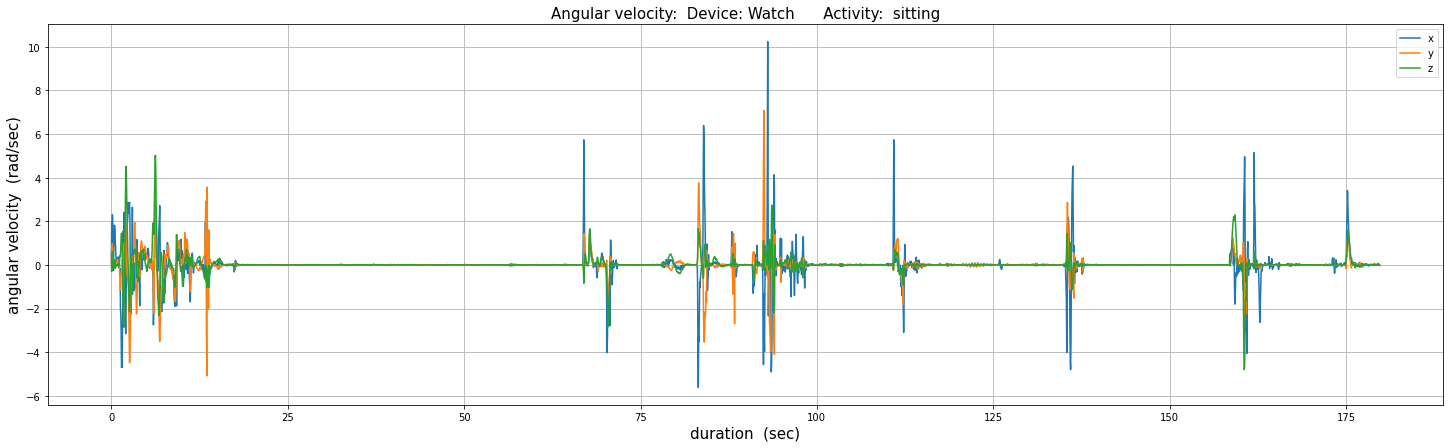

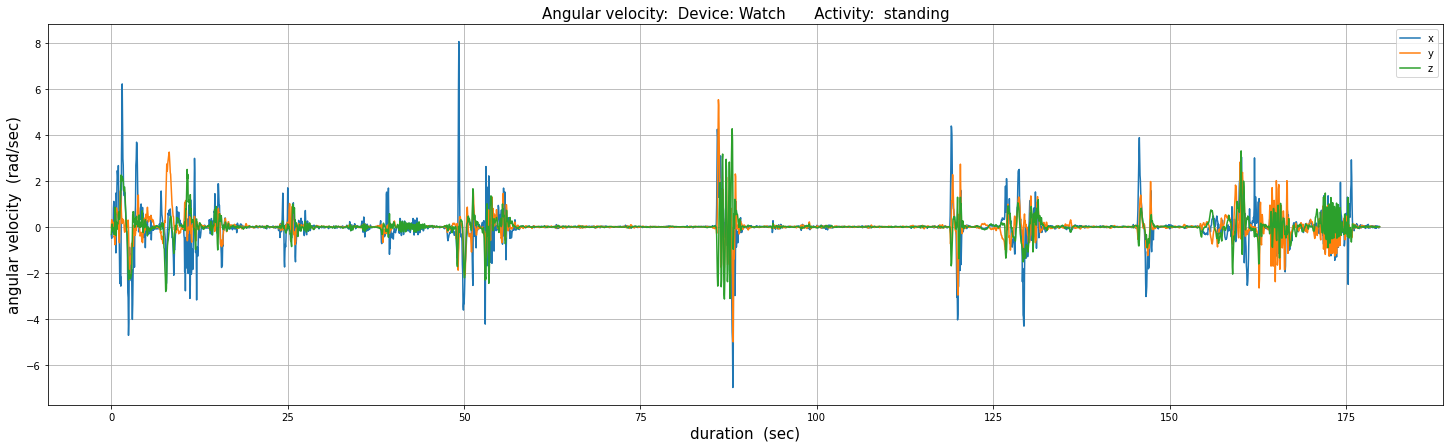

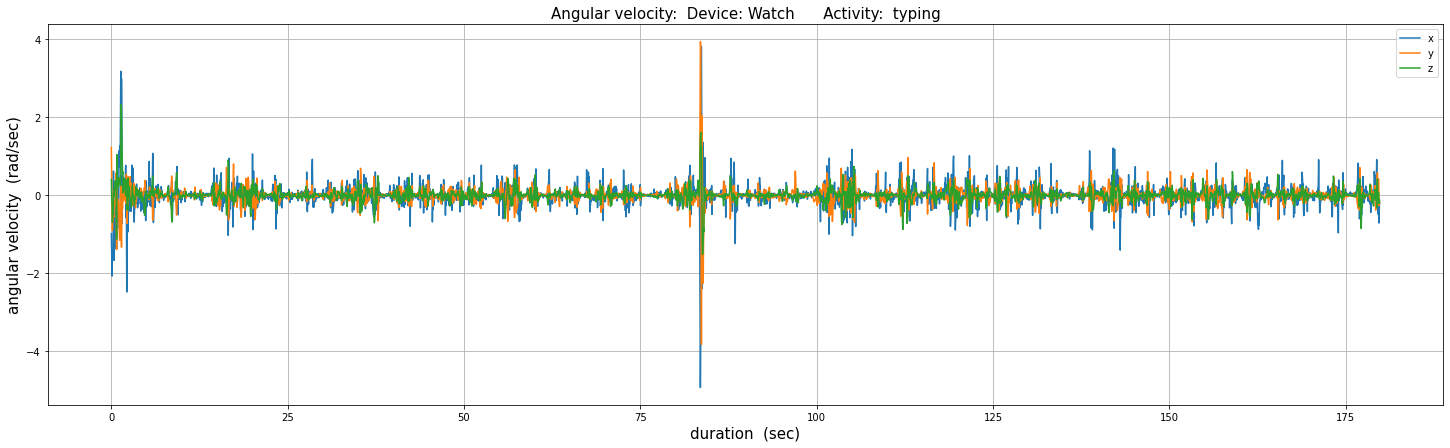

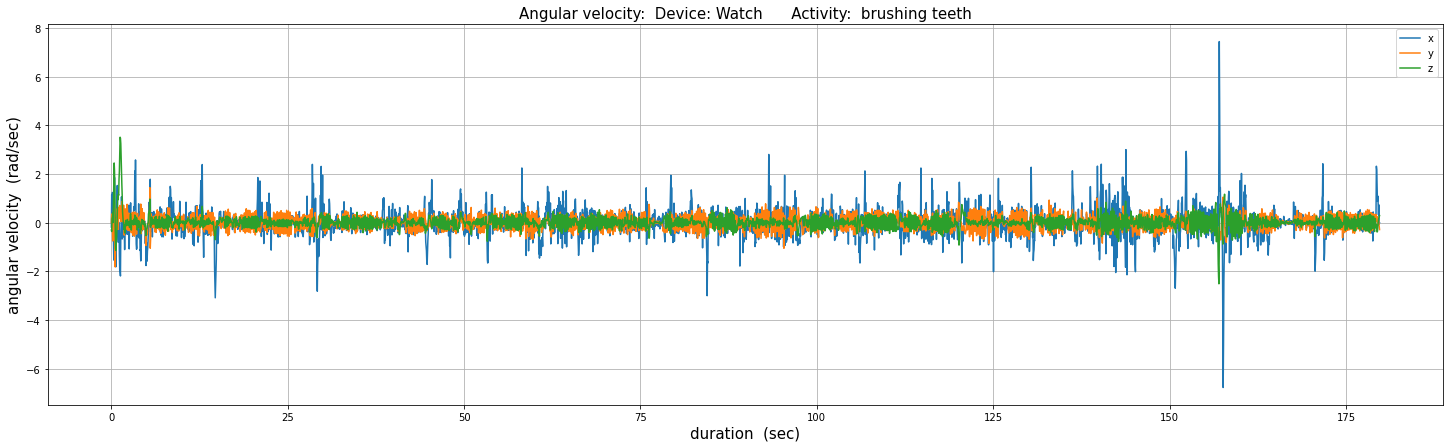

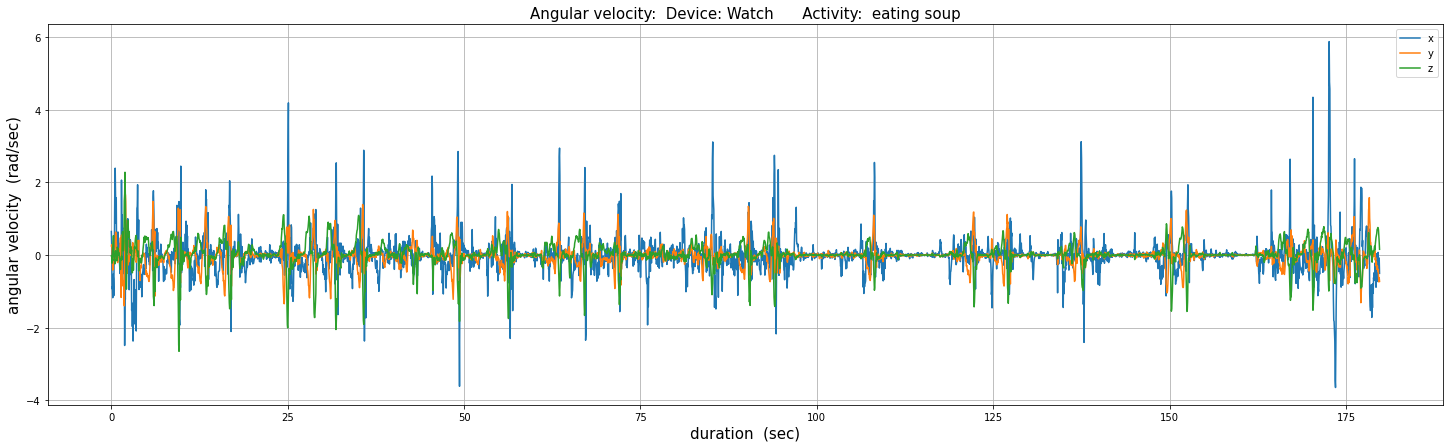

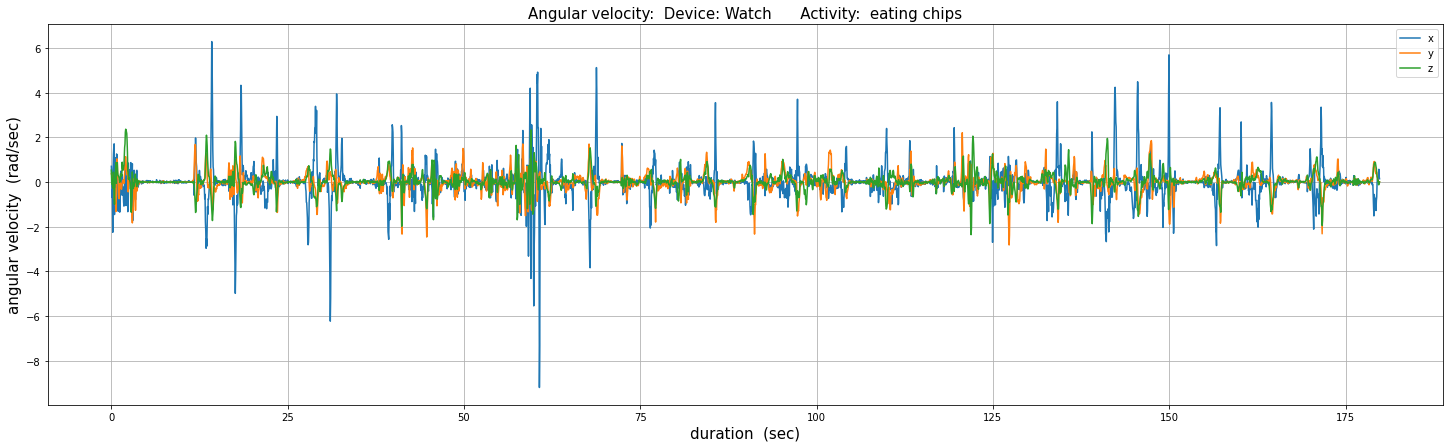

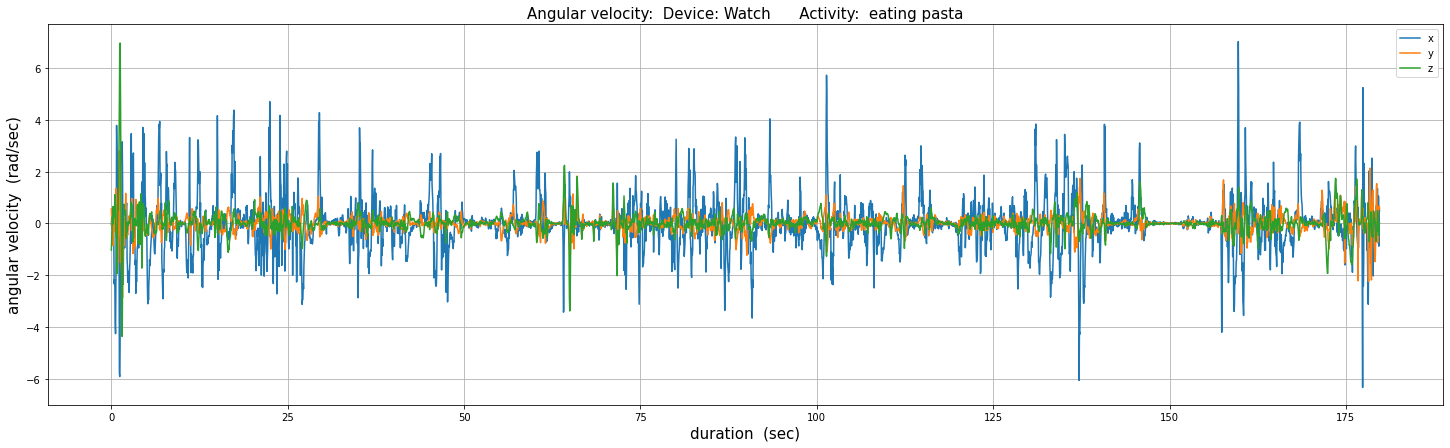

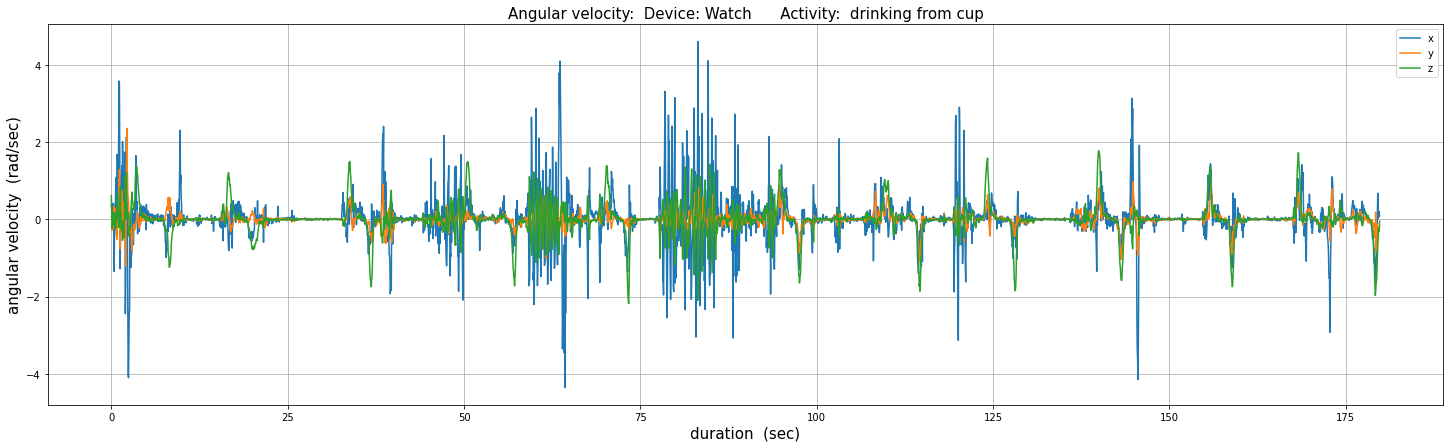

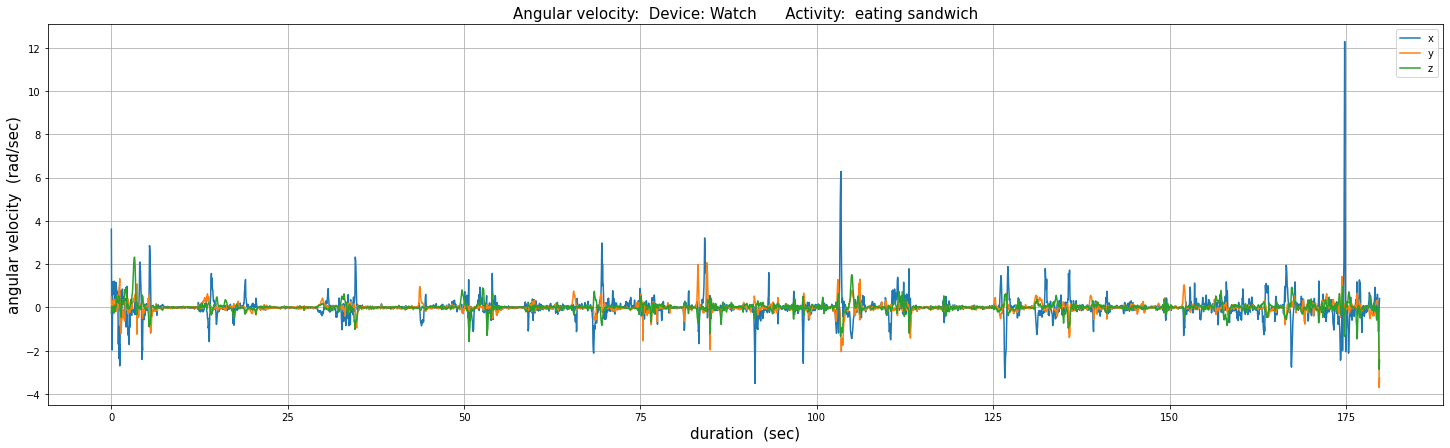

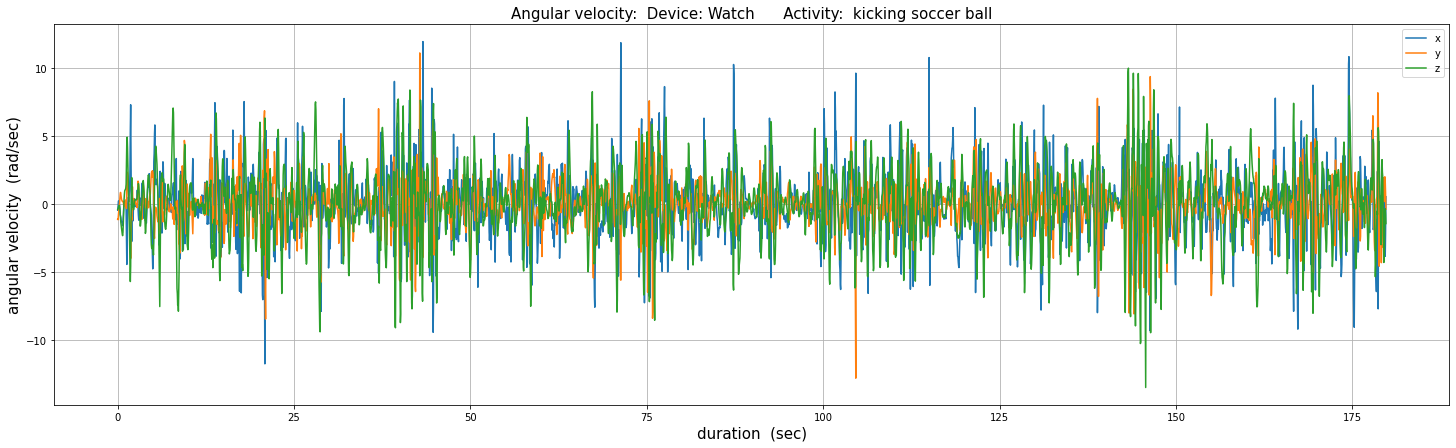

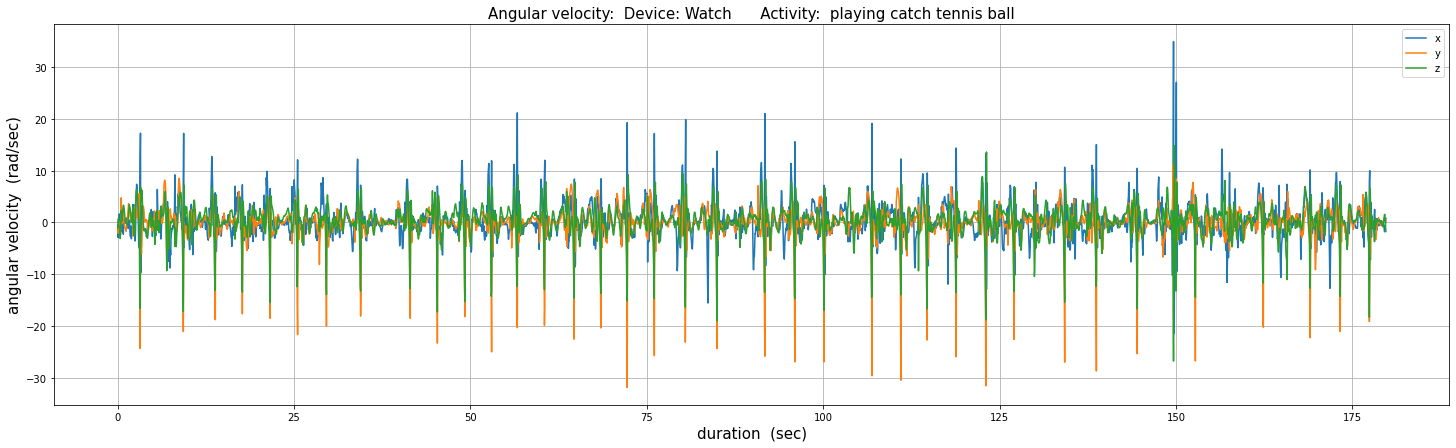

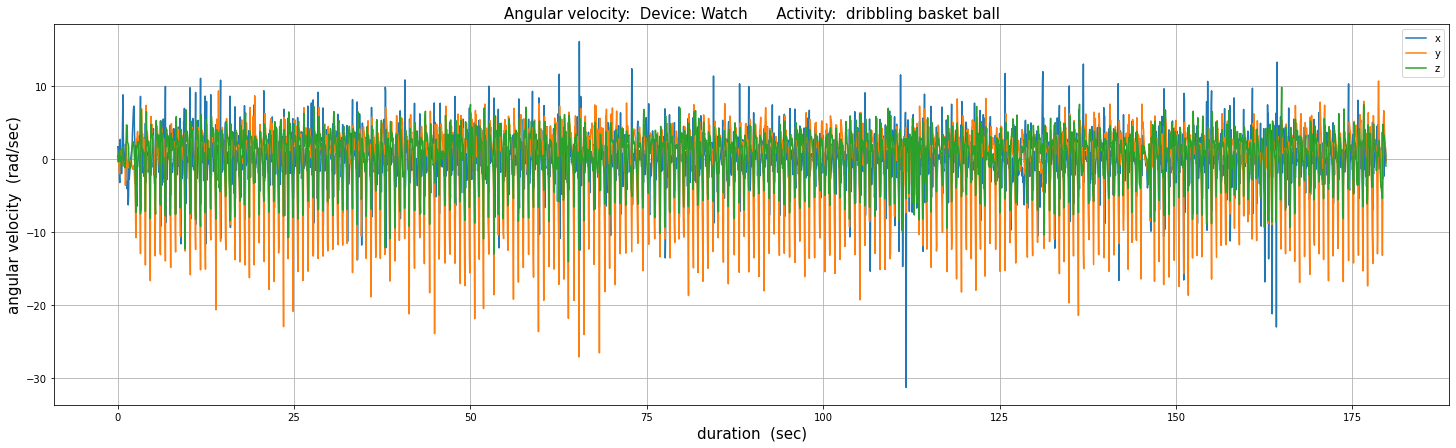

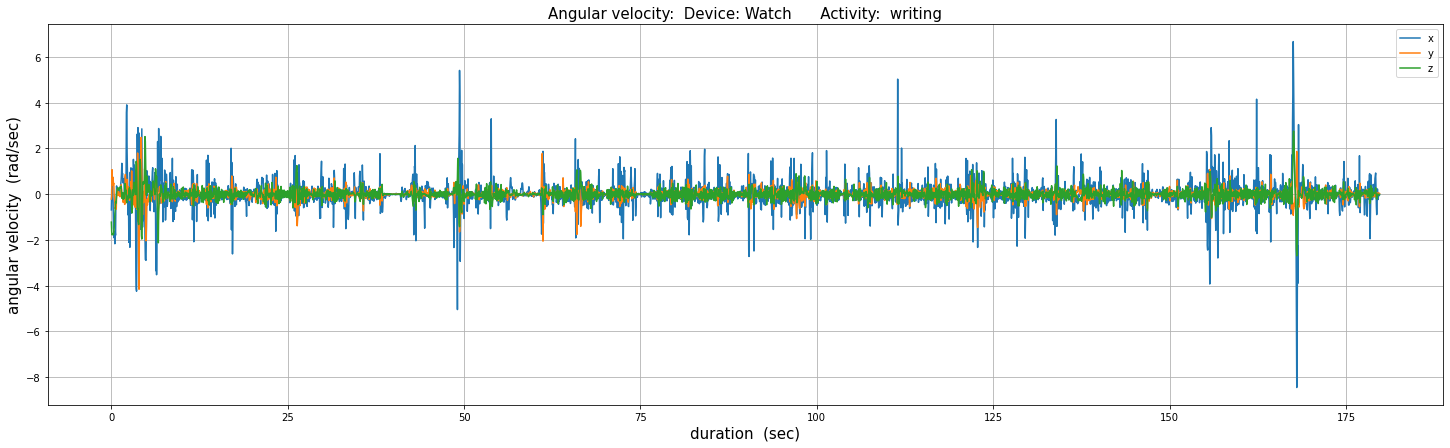

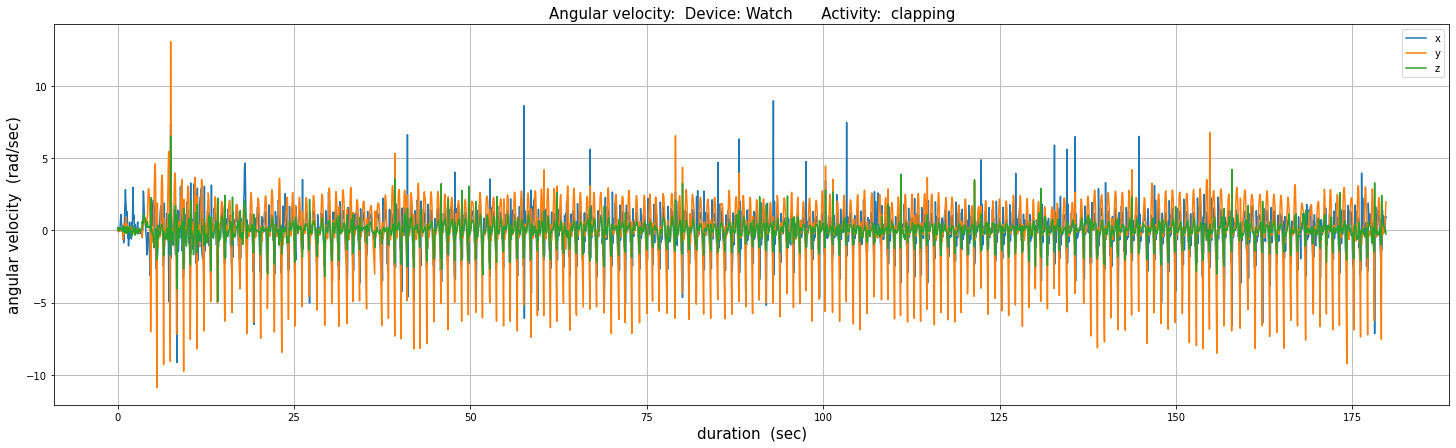

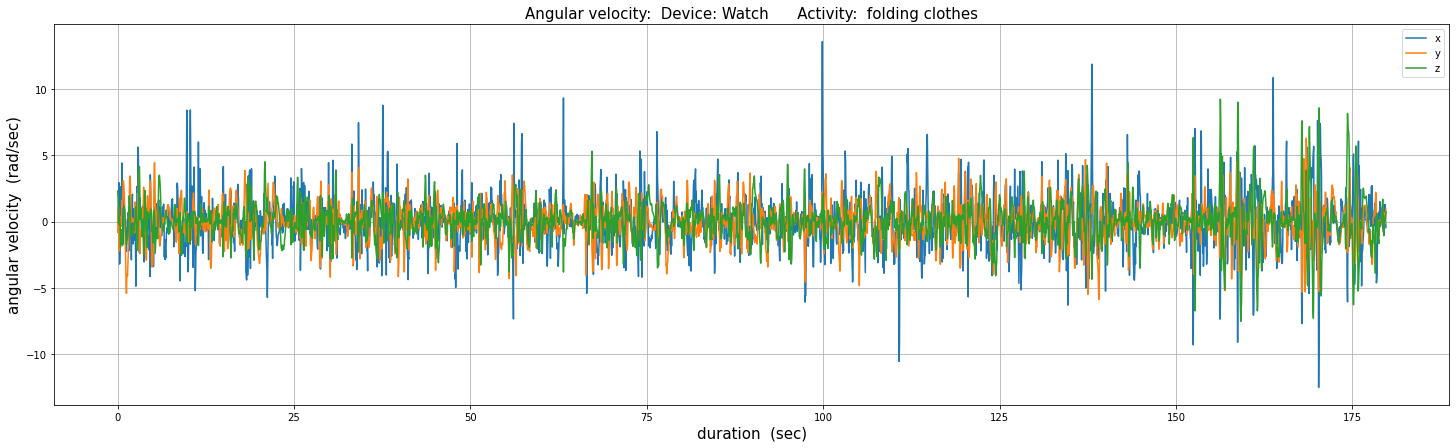

In [10]:
for key in activity_codes_mapping:
  show_ang_velocity_per_activity('Watch', raw_par_35_watch_ang_vel, activity_codes_mapping[key])

In [11]:
features = ['ACTIVITY',
            'X0',
            'X1', 
            'X2',
            'X3',
            'X4',
            'X5',
            'X6',
            'X7',
            'X8',
            'X9',
            'Y0', 
            'Y1', 
            'Y2',
            'Y3',
            'Y4',
            'Y5',
            'Y6',
            'Y7',
            'Y8',
            'Y9',
            'Z0', 
            'Z1',
            'Z2',
            'Z3',
            'Z4',
            'Z5',
            'Z6',
            'Z7',
            'Z8',
            'Z9',
            'XAVG', 
            'YAVG',
            'ZAVG',
            'XPEAK', 
            'YPEAK',
            'ZPEAK',
            'XABSOLDEV', 
            'YABSOLDEV',
            'ZABSOLDEV',
            'XSTANDDEV', 
            'YSTANDDEV',
            'ZSTANDDEV',
            'XVAR',  
            'YVAR',
            'ZVAR',
            'XMFCC0',
            'XMFCC1',
            'XMFCC2',
            'XMFCC3',
            'XMFCC4',
            'XMFCC5',
            'XMFCC6',
            'XMFCC7',
            'XMFCC8',
            'XMFCC9',
            'XMFCC10',
            'XMFCC11',
            'XMFCC12',
            'YMFCC0', 
            'YMFCC1',
            'YMFCC2',
            'YMFCC3',
            'YMFCC4',
            'YMFCC5',
            'YMFCC6',
            'YMFCC7',
            'YMFCC8',
            'YMFCC9',
            'YMFCC10',
            'YMFCC11',
            'YMFCC12',
            'ZMFCC0',
            'ZMFCC1',
            'ZMFCC2',
            'ZMFCC3',
            'ZMFCC4',
            'ZMFCC5',
            'ZMFCC6',
            'ZMFCC7',
            'ZMFCC8',
            'ZMFCC9',
            'ZMFCC10',
            'ZMFCC11',
            'ZMFCC12',
            'XYCOS', 
            'XZCOS',
            'YZCOS',
            'XYCOR', 
            'XZCOR',
            'YZCOR',
            'RESULTANT',
            'PARTICIPANT'] 

len(features)

93

In [12]:
import glob


duplicate_files = [str(i) for i in range(1611, 1618)] 

path = 'wisdm dataset'
all_files = glob.glob(path + "/*.arff")

list_dfs_watch_accel = []

for filename in all_files:

    if any(dup_fn in filename for dup_fn in duplicate_files):
        continue 
    df = pd.read_csv(filename, names = features, skiprows = 96, index_col=None, header=0)
    list_dfs_watch_accel.append(df)

all_watch_accel = pd.concat(list_dfs_watch_accel, axis=0, ignore_index=True, sort=False)

all_watch_accel

ACTIVITY     X0     X1     X2     X3     X4     X5     X6     X7     X8  \
0            A  0.980  0.020  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
1            A  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
2            A  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
3            A  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
4            A  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
15940        S  0.200  0.095  0.095  0.070  0.260  0.270  0.005  0.005  0.000   
15941        S  0.170  0.075  0.165  0.195  0.275  0.095  0.010  0.005  0.005   
15942        S  0.000  0.080  0.130  0.320  0.250  0.170  0.040  0.010  0.000   
15943        S  0.255  0.060  0.095  0.125  0.260  0.150  0.045  0.005  0.005   
15944        S  0.140  0.075  0.190  0.230  0.160  0.170  0.030  0.000  0.005   

       ...   ZMFCC11   ZMFCC12     XYCOS     XZCOS     YZCOS     XYCOR  \
0      ...  0.471081  0.465028  0.822471 -0.710470 -0.742999  0.142716   
1      ...  0.386820  0.381850  0.750230 -0.879635 -0.749721  0.108011   
2      ...  0.421260  0.415847  0.819975 -0.821701 -0.690365  0.069128   
3      ...  0.393768  0.388708  0.746606 -0.846270 -0.740065  0.126910   
4      ...  0.368504  0.363768  0.830877 -0.817762 -0.653460  0.148366   
...    ...       ...       ...       ...       ...       ...       ...   
15940  ...  0.574400  0.567019 -0.291660  0.494980 -0.119115  0.160748   
15941  ...  0.598493  0.590802 -0.612724  0.123891 -0.059526 -0.447293   
15942  ...  0.633258  0.625121 -0.582663  0.615044 -0.051855  0.374351   
15943  ...  0.578281  0.570850 -0.213376  0.520014 -0.200138  0.052640   
15944  ...  0.606281  0.598491 -0.638532  0.320681  0.011528 -0.466838   

          XZCOR     YZCOR  RESULTANT  PARTICIPANT  
0      0.101256 -0.283102    10.6904         1601  
1     -0.491226 -0.314622    10.8907         1601  
2     -0.362690 -0.063881    10.4112         1601  
3     -0.373965 -0.314760    11.1023         1601  
4     -0.300506  0.064930    10.4575         1601  
...         ...       ...        ...          ...  
15940  0.332131  0.607314    10.0358         1650  
15941 -0.045159  0.330019    10.3274         1650  
15942  0.602873  0.489070    10.1765         1650  
15943  0.372824  0.538689    10.3718         1650  
15944  0.043865  0.470220    10.2314         1650  

[15945 rows x 93 columns]

In [13]:
all_watch_accel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15945 entries, 0 to 15944
Data columns (total 93 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ACTIVITY     15945 non-null  object 
 1   X0           15945 non-null  float64
 2   X1           15945 non-null  float64
 3   X2           15945 non-null  float64
 4   X3           15945 non-null  float64
 5   X4           15945 non-null  float64
 6   X5           15945 non-null  float64
 7   X6           15945 non-null  float64
 8   X7           15945 non-null  float64
 9   X8           15945 non-null  float64
 10  X9           15945 non-null  float64
 11  Y0           15945 non-null  float64
 12  Y1           15945 non-null  float64
 13  Y2           15945 non-null  float64
 14  Y3           15945 non-null  float64
 15  Y4           15945 non-null  float64
 16  Y5           15945 non-null  float64
 17  Y6           15945 non-null  float64
 18  Y7           15945 non-null  float64
 19  Y8  

In [14]:
all_watch_accel_breakpoint = all_watch_accel.copy()

In [15]:
all_watch_accel['ACTIVITY'].map(activity_codes_mapping).value_counts()

standing                     920
drinking from cup            918
writing                      912
sitting                      902
dribbling basket ball        891
folding clothes              890
playing catch tennis ball    889
eating soup                  886
walking                      885
jogging                      885
eating chips                 885
kicking soccer ball          883
clapping                     882
brushing teeth               880
stairs                       871
typing                       862
eating sandwich              852
eating pasta                 852
Name: ACTIVITY, dtype: int64

In [16]:
all_watch_accel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15945 entries, 0 to 15944
Data columns (total 93 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ACTIVITY     15945 non-null  object 
 1   X0           15945 non-null  float64
 2   X1           15945 non-null  float64
 3   X2           15945 non-null  float64
 4   X3           15945 non-null  float64
 5   X4           15945 non-null  float64
 6   X5           15945 non-null  float64
 7   X6           15945 non-null  float64
 8   X7           15945 non-null  float64
 9   X8           15945 non-null  float64
 10  X9           15945 non-null  float64
 11  Y0           15945 non-null  float64
 12  Y1           15945 non-null  float64
 13  Y2           15945 non-null  float64
 14  Y3           15945 non-null  float64
 15  Y4           15945 non-null  float64
 16  Y5           15945 non-null  float64
 17  Y6           15945 non-null  float64
 18  Y7           15945 non-null  float64
 19  Y8  

In [17]:
all_watch_accel_breakpoint = all_watch_accel.copy()

In [18]:
all_watch_accel['ACTIVITY'].map(activity_codes_mapping).value_counts()

standing                     920
drinking from cup            918
writing                      912
sitting                      902
dribbling basket ball        891
folding clothes              890
playing catch tennis ball    889
eating soup                  886
walking                      885
jogging                      885
eating chips                 885
kicking soccer ball          883
clapping                     882
brushing teeth               880
stairs                       871
typing                       862
eating sandwich              852
eating pasta                 852
Name: ACTIVITY, dtype: int64

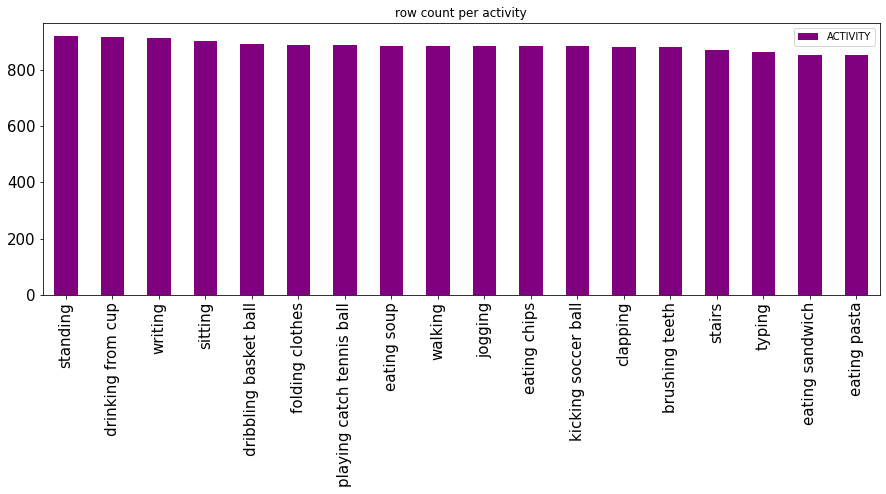

In [19]:
_ = all_watch_accel['ACTIVITY'].map(activity_codes_mapping).value_counts().plot(kind = 'bar', figsize = (15,5), color = 'purple', title = 'row count per activity', legend = True, fontsize = 15)

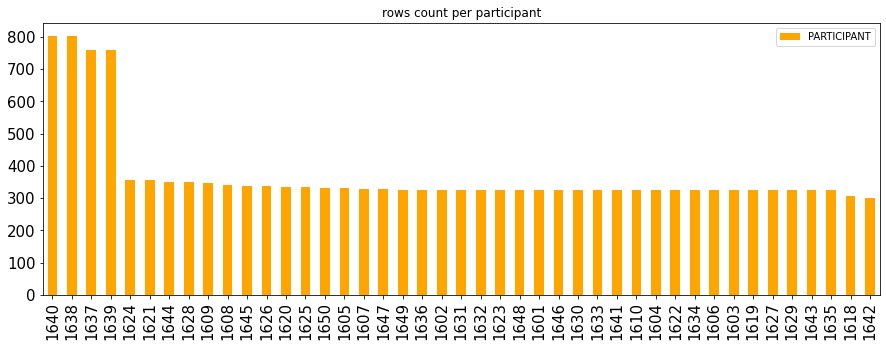

In [20]:
_ = all_watch_accel['PARTICIPANT'].value_counts().plot(kind = 'bar', figsize = (15,5), color = 'orange', title= 'rows count per participant', legend = True, fontsize = 15)

In [21]:
all_watch_accel[['XABSOLDEV', 'YABSOLDEV','ZABSOLDEV','XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV', 'XVAR', 'YVAR', 'ZVAR']].head()

XABSOLDEV  YABSOLDEV  ZABSOLDEV  XSTANDDEV  YSTANDDEV  ZSTANDDEV      XVAR  \
0    2.38133    1.21509    1.50144   0.222876   0.106652   0.141596  0.472097   
1    2.57934    1.52708    1.23906   0.214172   0.135861   0.101749  0.462787   
2    2.48672    1.38380    1.28802   0.203873   0.127427   0.117771  0.451523   
3    2.90161    1.73699    1.19579   0.241350   0.153660   0.099160  0.491274   
4    2.55665    1.35143    1.17950   0.205197   0.117921   0.101631  0.452986   

       YVAR      ZVAR  
0  0.326576  0.376293  
1  0.368593  0.318981  
2  0.356970  0.343178  
3  0.391994  0.314897  
4  0.343396  0.318796

In [22]:
all_watch_accel[['XABSOLDEV', 'YABSOLDEV','ZABSOLDEV','XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV', 'XVAR', 'YVAR', 'ZVAR']].head()

XABSOLDEV  YABSOLDEV  ZABSOLDEV  XSTANDDEV  YSTANDDEV  ZSTANDDEV      XVAR  \
0    2.38133    1.21509    1.50144   0.222876   0.106652   0.141596  0.472097   
1    2.57934    1.52708    1.23906   0.214172   0.135861   0.101749  0.462787   
2    2.48672    1.38380    1.28802   0.203873   0.127427   0.117771  0.451523   
3    2.90161    1.73699    1.19579   0.241350   0.153660   0.099160  0.491274   
4    2.55665    1.35143    1.17950   0.205197   0.117921   0.101631  0.452986   

       YVAR      ZVAR  
0  0.326576  0.376293  
1  0.368593  0.318981  
2  0.356970  0.343178  
3  0.391994  0.314897  
4  0.343396  0.318796

In [23]:
all_watch_accel.drop(['XSTANDDEV','YSTANDDEV','ZSTANDDEV','XVAR','YVAR','ZVAR'], axis = 1, inplace = True)

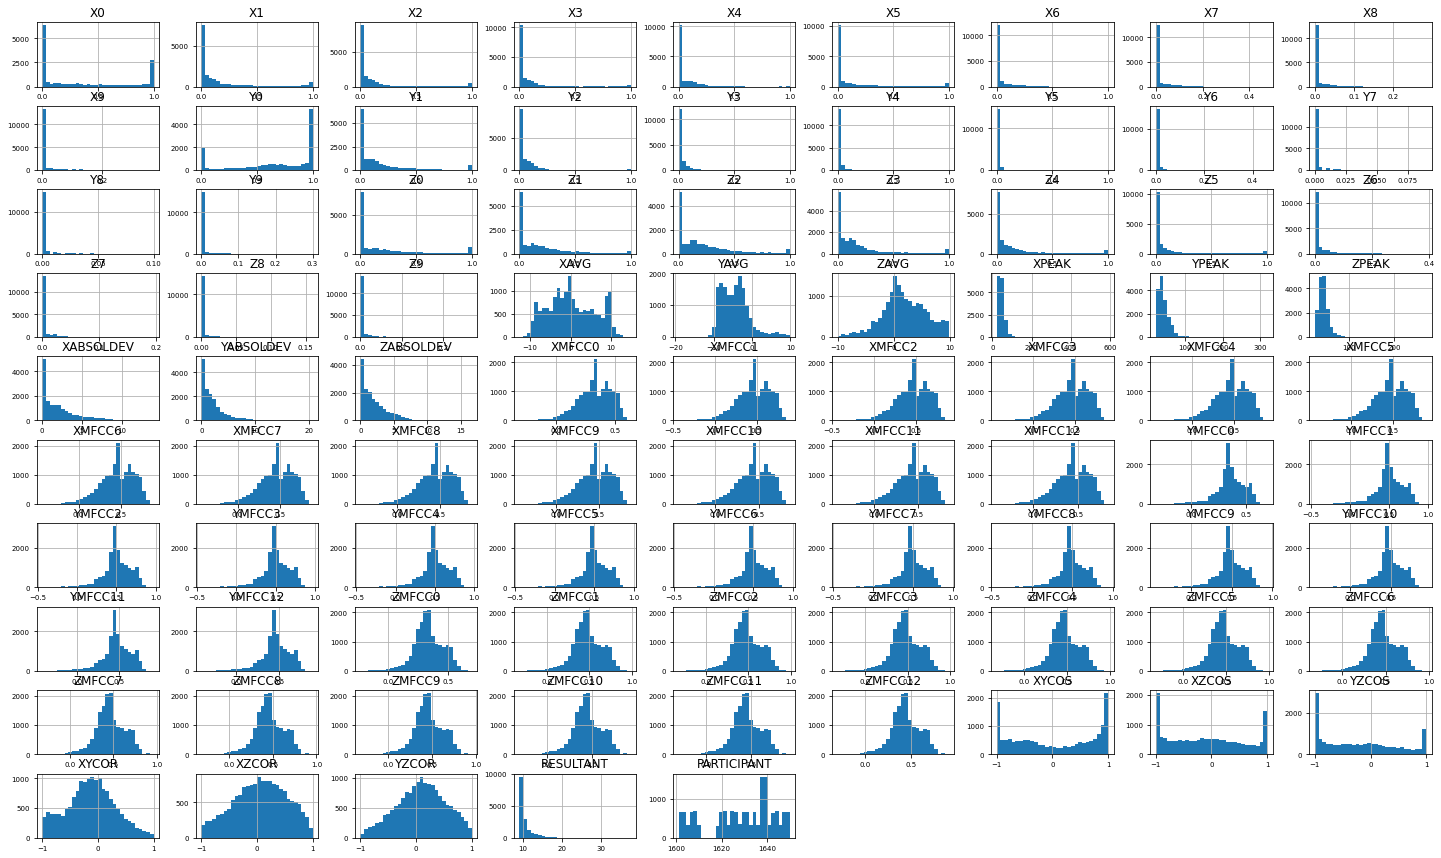

In [24]:
ax = all_watch_accel.hist(bins=30, figsize=(25, 15), xlabelsize = 7, ylabelsize = 7)

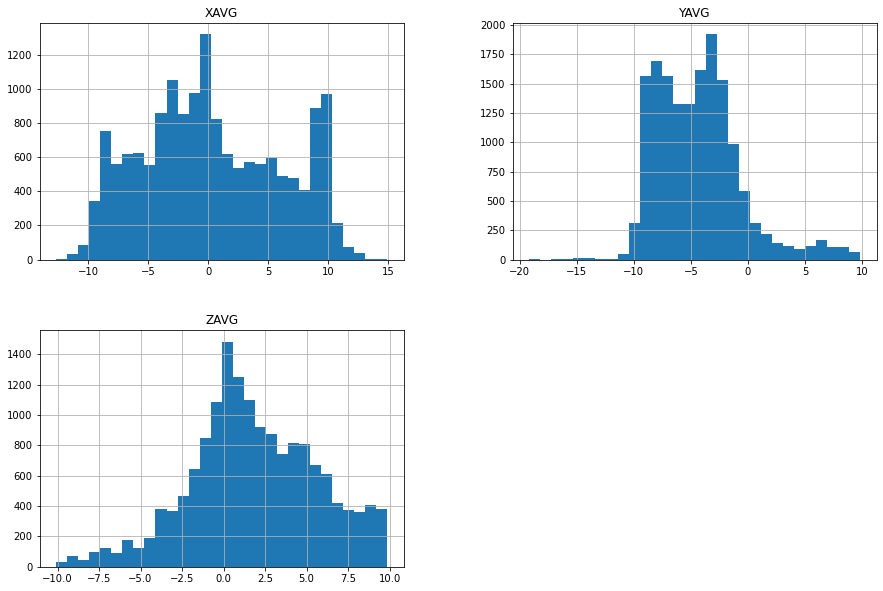

In [25]:
_ = all_watch_accel[['XAVG', 'YAVG', 'ZAVG']].hist(bins=30, figsize=(15, 10))

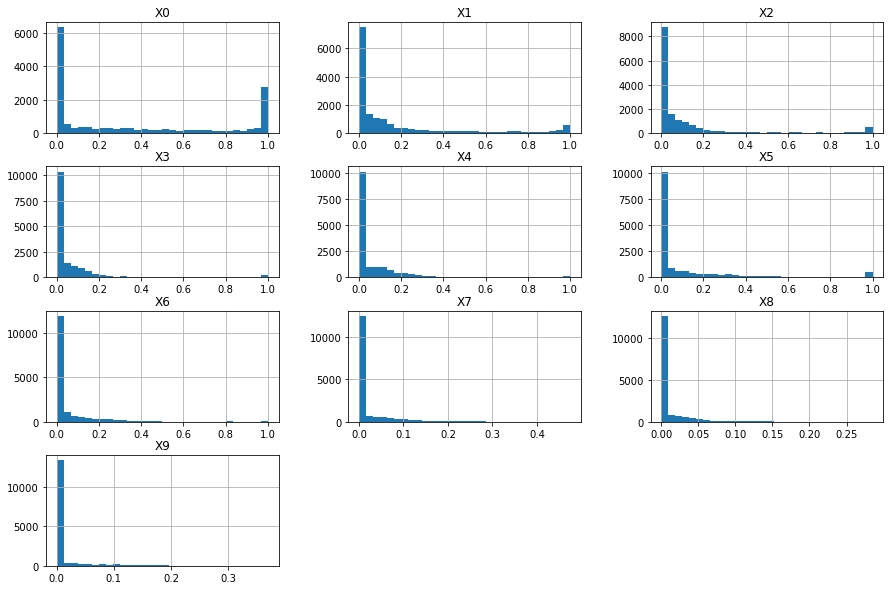

In [26]:
_ = all_watch_accel[['X0', 'X1', 'X2', 'X3','X4','X5','X6','X7','X8','X9']].hist(bins=30, figsize=(15, 10))

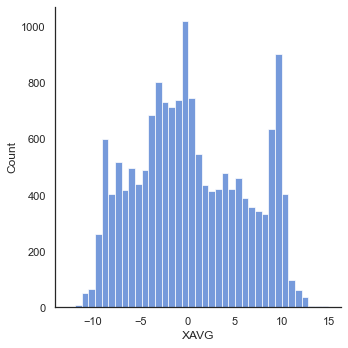

In [27]:
import seaborn as sns

sns.set(color_codes=True)
sns.set(style="white", palette="muted")
_ = sns.displot(all_watch_accel['XAVG'])

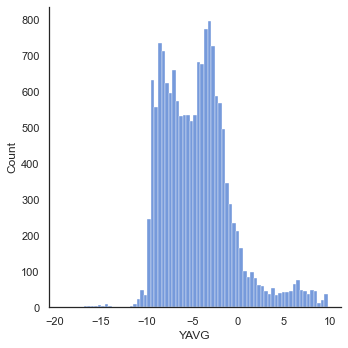

In [28]:
_ = sns.displot(all_watch_accel['YAVG'])

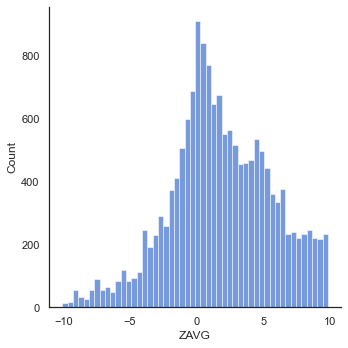

In [29]:
_ = sns.displot(all_watch_accel['ZAVG'])

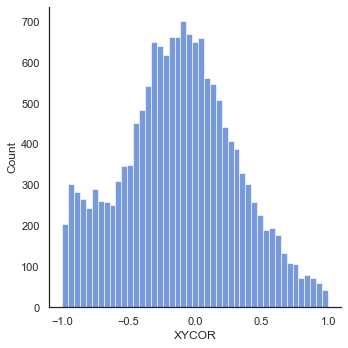

In [30]:
_ = sns.displot(all_watch_accel['XYCOR'])

# preprocessing

In [31]:
all_watch_accel.drop('PARTICIPANT', axis = 1, inplace = True)

In [32]:
from sklearn.model_selection import train_test_split

y = all_watch_accel.ACTIVITY
X = all_watch_accel.drop('ACTIVITY', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.75, 
                                                    test_size = 0.25,
                                                    shuffle = True, 
                                                    stratify = all_watch_accel.ACTIVITY)

In [33]:
X_train

X0     X1     X2     X3     X4     X5     X6     X7    X8     X9  \
8568   0.210  0.215  0.290  0.215  0.060  0.005  0.000  0.005  0.00  0.000   
14947  0.305  0.050  0.085  0.165  0.235  0.130  0.030  0.000  0.00  0.000   
3414   1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.00  0.000   
10746  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.00  0.000   
7048   0.000  0.000  0.000  0.000  0.000  1.000  0.000  0.000  0.00  0.000   
...      ...    ...    ...    ...    ...    ...    ...    ...   ...    ...   
7512   0.000  0.005  0.010  0.010  0.090  0.540  0.255  0.055  0.02  0.015   
3463   0.885  0.115  0.000  0.000  0.000  0.000  0.000  0.000  0.00  0.000   
412    0.000  0.000  0.000  0.000  0.010  0.975  0.015  0.000  0.00  0.000   
9205   1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.00  0.000   
15033  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.00  0.000   

       ...   ZMFCC10   ZMFCC11   ZMFCC12     XYCOS     XZCOS     YZCOS  \
8568   ...  0.596323  0.589381  0.581807 -0.118429 -0.207948 -0.529735   
14947  ...  0.545227  0.538879  0.531955 -0.442712  0.016620 -0.156078   
3414   ...  0.415382  0.410547  0.405271  0.007405 -0.975689  0.119364   
10746  ...  0.298251  0.294779  0.290991  0.999944 -0.999892 -0.999973   
7048   ...  0.034259  0.033860  0.033425 -0.999330 -0.996683  0.997075   
...    ...       ...       ...       ...       ...       ...       ...   
7512   ...  0.565772  0.559185  0.552000 -0.659523  0.149776 -0.363070   
3463   ...  0.487924  0.482243  0.476046  0.932643 -0.764709 -0.684649   
412    ...  0.296574  0.293121  0.289355 -0.980297  0.521244 -0.467232   
9205   ...  0.582577  0.575795  0.568396  0.894295 -0.812431 -0.884329   
15033  ...  0.453551  0.448271  0.442511  0.997539 -0.998088 -0.999080   

          XYCOR     XZCOR     YZCOR  RESULTANT  
8568  -0.163113 -0.462745  0.337944   10.61020  
14947 -0.381857 -0.151710  0.552402   10.15990  
3414   0.692486  0.861608  0.517183    9.96443  
10746  0.060464  0.667100  0.520802    9.38012  
7048   0.518598  0.129172  0.328169    9.80413  
...         ...       ...       ...        ...  
7512   0.047813 -0.239400 -0.301971   10.98000  
3463   0.183576  0.522941  0.791381    9.69516  
412   -0.240701 -0.491525  0.370239    9.78765  
9205   0.187046  0.175430 -0.576954   10.12840  
15033  0.112036  0.028722  0.235198    9.72731  

[11958 rows x 85 columns]

In [34]:
y_train

8568     S
14947    S
3414     G
10746    J
7048     E
        ..
7512     M
3463     J
412      E
9205     R
15033    D
Name: ACTIVITY, Length: 11958, dtype: object

In [35]:
X_test

X0     X1     X2     X3     X4     X5     X6     X7     X8   X9  \
4082   0.715  0.075  0.135  0.065  0.005  0.005  0.000  0.000  0.000  0.0   
3421   0.115  0.885  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0   
5940   0.630  0.070  0.090  0.075  0.095  0.015  0.020  0.005  0.000  0.0   
13990  0.000  0.035  0.240  0.120  0.155  0.145  0.125  0.105  0.075  0.0   
5341   0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
6375   0.315  0.100  0.060  0.060  0.095  0.290  0.080  0.000  0.000  0.0   
3761   1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0   
13743  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0   
9820   0.000  0.000  0.000  0.000  0.000  0.975  0.025  0.000  0.000  0.0   
2770   0.925  0.075  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0   

       ...   ZMFCC10   ZMFCC11   ZMFCC12     XYCOS     XZCOS     YZCOS  \
4082   ...  0.455976  0.450668  0.444877  0.364499 -0.158415 -0.576558   
3421   ...  0.257854  0.254852  0.251577  0.848249 -0.701212 -0.840005   
5940   ...  0.583570  0.576776  0.569364  0.258161 -0.114758  0.264409   
13990  ...  0.488860  0.483169  0.476960 -0.671868  0.150310 -0.115732   
5341   ...  0.455202  0.449903  0.444121  0.797357  0.821138  0.995759   
...    ...       ...       ...       ...       ...       ...       ...   
6375   ...  0.489663  0.483962  0.477743 -0.243825  0.005266 -0.468097   
3761   ...  0.355875  0.351732  0.347212  0.848154 -0.030339 -0.166788   
13743  ...  0.329684  0.325846  0.321659  0.855123 -0.904036 -0.982744   
9820   ...  0.231587  0.228891  0.225950  0.913279 -0.993472 -0.882915   
2770   ...  0.515479  0.509478  0.502931 -0.119981 -0.847000  0.146979   

          XYCOR     XZCOR     YZCOR  RESULTANT  
4082  -0.815795  0.423875 -0.305082    9.94208  
3421  -0.761952  0.194357  0.359846    9.62528  
5940  -0.312670 -0.196169  0.312700   10.18700  
13990 -0.378575 -0.767859  0.426357   10.73630  
5341  -0.422544 -0.157228 -0.078528    9.86498  
...         ...       ...       ...        ...  
6375   0.331121 -0.471855  0.300319    9.70447  
3761  -0.912430  0.190721 -0.309401    9.83200  
13743 -0.844618  0.812395 -0.940224    9.97522  
9820  -0.227252  0.201728  0.591762   10.09640  
2770  -0.325508  0.605788  0.392720    9.98955  

[3987 rows x 85 columns]

In [36]:
y_test

4082     I
3421     H
5940     S
13990    A
5341     E
        ..
6375     F
3761     J
13743    G
9820     G
2770     I
Name: ACTIVITY, Length: 3987, dtype: object

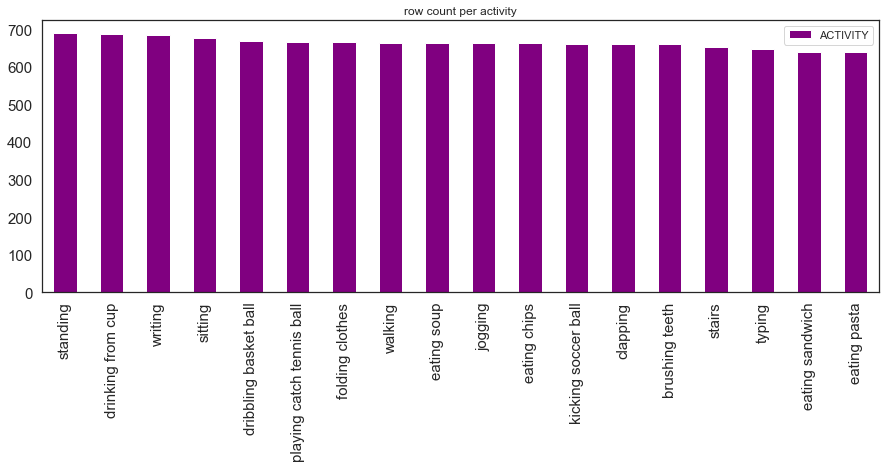

In [37]:
_ = y_train.map(activity_codes_mapping).value_counts().plot(kind = 'bar', figsize = (15,5), color = 'purple', title = 'row count per activity', legend = True, fontsize = 15)

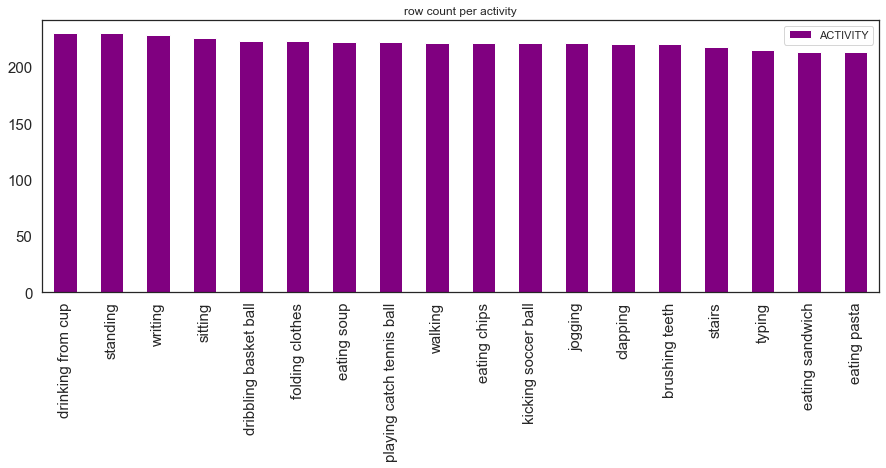

In [38]:
_ = y_test.map(activity_codes_mapping).value_counts().plot(kind = 'bar', figsize = (15,5), color = 'purple', title = 'row count per activity', legend = True, fontsize = 15)

In [39]:
X_train.insert(0, 'Y', y_train)

In [40]:
X_train

Y     X0     X1     X2     X3     X4     X5     X6     X7    X8  ...  \
8568   S  0.210  0.215  0.290  0.215  0.060  0.005  0.000  0.005  0.00  ...   
14947  S  0.305  0.050  0.085  0.165  0.235  0.130  0.030  0.000  0.00  ...   
3414   G  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.00  ...   
10746  J  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.00  ...   
7048   E  0.000  0.000  0.000  0.000  0.000  1.000  0.000  0.000  0.00  ...   
...   ..    ...    ...    ...    ...    ...    ...    ...    ...   ...  ...   
7512   M  0.000  0.005  0.010  0.010  0.090  0.540  0.255  0.055  0.02  ...   
3463   J  0.885  0.115  0.000  0.000  0.000  0.000  0.000  0.000  0.00  ...   
412    E  0.000  0.000  0.000  0.000  0.010  0.975  0.015  0.000  0.00  ...   
9205   R  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.00  ...   
15033  D  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.00  ...   

        ZMFCC10   ZMFCC11   ZMFCC12     XYCOS     XZCOS     YZCOS     XYCOR  \
8568   0.596323  0.589381  0.581807 -0.118429 -0.207948 -0.529735 -0.163113   
14947  0.545227  0.538879  0.531955 -0.442712  0.016620 -0.156078 -0.381857   
3414   0.415382  0.410547  0.405271  0.007405 -0.975689  0.119364  0.692486   
10746  0.298251  0.294779  0.290991  0.999944 -0.999892 -0.999973  0.060464   
7048   0.034259  0.033860  0.033425 -0.999330 -0.996683  0.997075  0.518598   
...         ...       ...       ...       ...       ...       ...       ...   
7512   0.565772  0.559185  0.552000 -0.659523  0.149776 -0.363070  0.047813   
3463   0.487924  0.482243  0.476046  0.932643 -0.764709 -0.684649  0.183576   
412    0.296574  0.293121  0.289355 -0.980297  0.521244 -0.467232 -0.240701   
9205   0.582577  0.575795  0.568396  0.894295 -0.812431 -0.884329  0.187046   
15033  0.453551  0.448271  0.442511  0.997539 -0.998088 -0.999080  0.112036   

          XZCOR     YZCOR  RESULTANT  
8568  -0.462745  0.337944   10.61020  
14947 -0.151710  0.552402   10.15990  
3414   0.861608  0.517183    9.96443  
10746  0.667100  0.520802    9.38012  
7048   0.129172  0.328169    9.80413  
...         ...       ...        ...  
7512  -0.239400 -0.301971   10.98000  
3463   0.522941  0.791381    9.69516  
412   -0.491525  0.370239    9.78765  
9205   0.175430 -0.576954   10.12840  
15033  0.028722  0.235198    9.72731  

[11958 rows x 86 columns]

In [41]:
upper_threshold_XPEAK = X_train.XPEAK.mean() + 9*X_train.XPEAK.std()
upper_threshold_XPEAK

194.19867238593432

In [42]:
X_train.XPEAK.max()

590.0

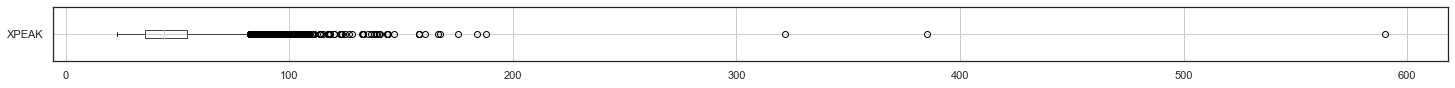

In [43]:
_ = X_train.boxplot(column=['XPEAK'], figsize=[25,1], vert=False)

In [44]:
X_train = X_train[X_train.XPEAK < upper_threshold_XPEAK].copy()

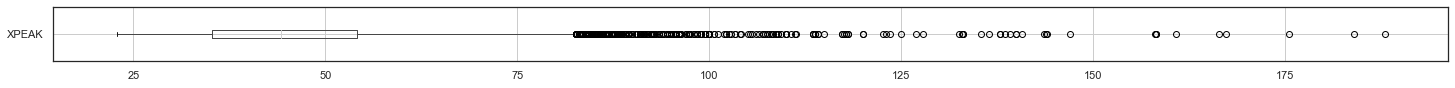

In [45]:
_ = X_train.boxplot(column=['XPEAK'], figsize=[25,1], vert=False)

In [46]:
upper_threshold_YPEAK = X_train.YPEAK.mean() + 9*X_train.YPEAK.std()
upper_threshold_YPEAK


174.12339586502628

In [47]:
X_train.YPEAK.max()

318.0

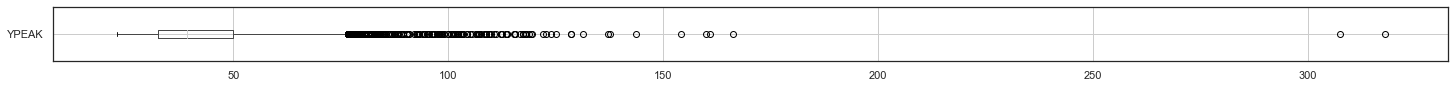

In [48]:
#X_Train 
_ = X_train.boxplot(column=['YPEAK'], figsize=[25,1], vert=False)

In [49]:
#Z_Peak

In [50]:
upper_threshold_ZPEAK = X_train.ZPEAK.mean() + 9*X_train.ZPEAK.std()
upper_threshold_ZPEAK

142.14105582507625

In [51]:
X_train.ZPEAK.max()

271.42900000000003

In [52]:
#X_train

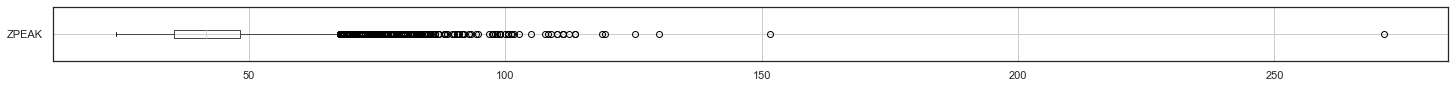

In [53]:
_ = X_train.boxplot(column=['ZPEAK'], figsize=[25,1], vert=False)

In [54]:
X_train = X_train[X_train.ZPEAK < upper_threshold_ZPEAK].copy()

In [55]:
#X_train

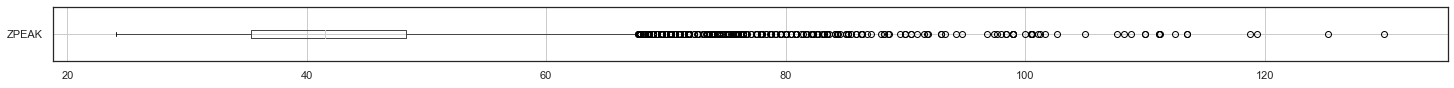

In [56]:
_ = X_train.boxplot(column=['ZPEAK'], figsize=[25,1], vert=False)

In [57]:
y_train = X_train['Y']

In [58]:
y_train

8568     S
14947    S
3414     G
10746    J
7048     E
        ..
7512     M
3463     J
412      E
9205     R
15033    D
Name: Y, Length: 11953, dtype: object

In [59]:
X_train.drop(['Y'], axis = 1, inplace = True)

# Scaling

In [60]:
from sklearn.preprocessing import MaxAbsScaler

scaling_transformer = MaxAbsScaler().fit(X_train[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'RESULTANT']])

In [61]:
X_train[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'RESULTANT']] = scaling_transformer.transform(X_train[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'RESULTANT']])

In [62]:
X_test = X_test.copy()

In [63]:
X_test[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'RESULTANT']] = scaling_transformer.transform(X_test[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'RESULTANT']])

In [64]:
X_test

X0     X1     X2     X3     X4     X5     X6     X7     X8   X9  \
4082   0.715  0.075  0.135  0.065  0.005  0.005  0.000  0.000  0.000  0.0   
3421   0.115  0.885  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0   
5940   0.630  0.070  0.090  0.075  0.095  0.015  0.020  0.005  0.000  0.0   
13990  0.000  0.035  0.240  0.120  0.155  0.145  0.125  0.105  0.075  0.0   
5341   0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
6375   0.315  0.100  0.060  0.060  0.095  0.290  0.080  0.000  0.000  0.0   
3761   1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0   
13743  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0   
9820   0.000  0.000  0.000  0.000  0.000  0.975  0.025  0.000  0.000  0.0   
2770   0.925  0.075  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0   

       ...   ZMFCC10   ZMFCC11   ZMFCC12     XYCOS     XZCOS     YZCOS  \
4082   ...  0.455976  0.450668  0.444877  0.364499 -0.158415 -0.576558   
3421   ...  0.257854  0.254852  0.251577  0.848249 -0.701212 -0.840005   
5940   ...  0.583570  0.576776  0.569364  0.258161 -0.114758  0.264409   
13990  ...  0.488860  0.483169  0.476960 -0.671868  0.150310 -0.115732   
5341   ...  0.455202  0.449903  0.444121  0.797357  0.821138  0.995759   
...    ...       ...       ...       ...       ...       ...       ...   
6375   ...  0.489663  0.483962  0.477743 -0.243825  0.005266 -0.468097   
3761   ...  0.355875  0.351732  0.347212  0.848154 -0.030339 -0.166788   
13743  ...  0.329684  0.325846  0.321659  0.855123 -0.904036 -0.982744   
9820   ...  0.231587  0.228891  0.225950  0.913279 -0.993472 -0.882915   
2770   ...  0.515479  0.509478  0.502931 -0.119981 -0.847000  0.146979   

          XYCOR     XZCOR     YZCOR  RESULTANT  
4082  -0.815795  0.423875 -0.305082   0.278700  
3421  -0.761952  0.194357  0.359846   0.269820  
5940  -0.312670 -0.196169  0.312700   0.285566  
13990 -0.378575 -0.767859  0.426357   0.300964  
5341  -0.422544 -0.157228 -0.078528   0.276539  
...         ...       ...       ...        ...  
6375   0.331121 -0.471855  0.300319   0.272040  
3761  -0.912430  0.190721 -0.309401   0.275615  
13743 -0.844618  0.812395 -0.940224   0.279629  
9820  -0.227252  0.201728  0.591762   0.283026  
2770  -0.325508  0.605788  0.392720   0.280031  

[3987 rows x 85 columns]

In [65]:
X_train.reset_index(drop = True, inplace = True)
X_train

X0     X1     X2     X3     X4     X5     X6     X7    X8     X9  \
0      0.210  0.215  0.290  0.215  0.060  0.005  0.000  0.005  0.00  0.000   
1      0.305  0.050  0.085  0.165  0.235  0.130  0.030  0.000  0.00  0.000   
2      1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.00  0.000   
3      1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.00  0.000   
4      0.000  0.000  0.000  0.000  0.000  1.000  0.000  0.000  0.00  0.000   
...      ...    ...    ...    ...    ...    ...    ...    ...   ...    ...   
11948  0.000  0.005  0.010  0.010  0.090  0.540  0.255  0.055  0.02  0.015   
11949  0.885  0.115  0.000  0.000  0.000  0.000  0.000  0.000  0.00  0.000   
11950  0.000  0.000  0.000  0.000  0.010  0.975  0.015  0.000  0.00  0.000   
11951  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.00  0.000   
11952  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.00  0.000   

       ...   ZMFCC10   ZMFCC11   ZMFCC12     XYCOS     XZCOS     YZCOS  \
0      ...  0.596323  0.589381  0.581807 -0.118429 -0.207948 -0.529735   
1      ...  0.545227  0.538879  0.531955 -0.442712  0.016620 -0.156078   
2      ...  0.415382  0.410547  0.405271  0.007405 -0.975689  0.119364   
3      ...  0.298251  0.294779  0.290991  0.999944 -0.999892 -0.999973   
4      ...  0.034259  0.033860  0.033425 -0.999330 -0.996683  0.997075   
...    ...       ...       ...       ...       ...       ...       ...   
11948  ...  0.565772  0.559185  0.552000 -0.659523  0.149776 -0.363070   
11949  ...  0.487924  0.482243  0.476046  0.932643 -0.764709 -0.684649   
11950  ...  0.296574  0.293121  0.289355 -0.980297  0.521244 -0.467232   
11951  ...  0.582577  0.575795  0.568396  0.894295 -0.812431 -0.884329   
11952  ...  0.453551  0.448271  0.442511  0.997539 -0.998088 -0.999080   

          XYCOR     XZCOR     YZCOR  RESULTANT  
0     -0.163113 -0.462745  0.337944   0.297429  
1     -0.381857 -0.151710  0.552402   0.284806  
2      0.692486  0.861608  0.517183   0.279327  
3      0.060464  0.667100  0.520802   0.262947  
4      0.518598  0.129172  0.328169   0.274833  
...         ...       ...       ...        ...  
11948  0.047813 -0.239400 -0.301971   0.307796  
11949  0.183576  0.522941  0.791381   0.271779  
11950 -0.240701 -0.491525  0.370239   0.274371  
11951  0.187046  0.175430 -0.576954   0.283923  
11952  0.112036  0.028722  0.235198   0.272680  

[11953 rows x 85 columns]

In [66]:
X_test.reset_index(drop = True, inplace = True)
X_test

X0     X1     X2     X3     X4     X5     X6     X7     X8   X9  ...  \
0     0.715  0.075  0.135  0.065  0.005  0.005  0.000  0.000  0.000  0.0  ...   
1     0.115  0.885  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0  ...   
2     0.630  0.070  0.090  0.075  0.095  0.015  0.020  0.005  0.000  0.0  ...   
3     0.000  0.035  0.240  0.120  0.155  0.145  0.125  0.105  0.075  0.0  ...   
4     0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0  ...   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...  ...  ...   
3982  0.315  0.100  0.060  0.060  0.095  0.290  0.080  0.000  0.000  0.0  ...   
3983  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0  ...   
3984  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0  ...   
3985  0.000  0.000  0.000  0.000  0.000  0.975  0.025  0.000  0.000  0.0  ...   
3986  0.925  0.075  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0  ...   

       ZMFCC10   ZMFCC11   ZMFCC12     XYCOS     XZCOS     YZCOS     XYCOR  \
0     0.455976  0.450668  0.444877  0.364499 -0.158415 -0.576558 -0.815795   
1     0.257854  0.254852  0.251577  0.848249 -0.701212 -0.840005 -0.761952   
2     0.583570  0.576776  0.569364  0.258161 -0.114758  0.264409 -0.312670   
3     0.488860  0.483169  0.476960 -0.671868  0.150310 -0.115732 -0.378575   
4     0.455202  0.449903  0.444121  0.797357  0.821138  0.995759 -0.422544   
...        ...       ...       ...       ...       ...       ...       ...   
3982  0.489663  0.483962  0.477743 -0.243825  0.005266 -0.468097  0.331121   
3983  0.355875  0.351732  0.347212  0.848154 -0.030339 -0.166788 -0.912430   
3984  0.329684  0.325846  0.321659  0.855123 -0.904036 -0.982744 -0.844618   
3985  0.231587  0.228891  0.225950  0.913279 -0.993472 -0.882915 -0.227252   
3986  0.515479  0.509478  0.502931 -0.119981 -0.847000  0.146979 -0.325508   

         XZCOR     YZCOR  RESULTANT  
0     0.423875 -0.305082   0.278700  
1     0.194357  0.359846   0.269820  
2    -0.196169  0.312700   0.285566  
3    -0.767859  0.426357   0.300964  
4    -0.157228 -0.078528   0.276539  
...        ...       ...        ...  
3982 -0.471855  0.300319   0.272040  
3983  0.190721 -0.309401   0.275615  
3984  0.812395 -0.940224   0.279629  
3985  0.201728  0.591762   0.283026  
3986  0.605788  0.392720   0.280031  

[3987 rows x 85 columns]

In [67]:
y_train.reset_index(drop = True, inplace = True)
y_train

0        S
1        S
2        G
3        J
4        E
        ..
11948    M
11949    J
11950    E
11951    R
11952    D
Name: Y, Length: 11953, dtype: object

In [68]:
y_test.reset_index(drop = True, inplace = True)
y_test

0       I
1       H
2       S
3       A
4       E
       ..
3982    F
3983    J
3984    G
3985    G
3986    I
Name: ACTIVITY, Length: 3987, dtype: object

# 
Application of Machine Learning Classification Models

# Application of ML models

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time


from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import warnings





import pydot
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz

In [70]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


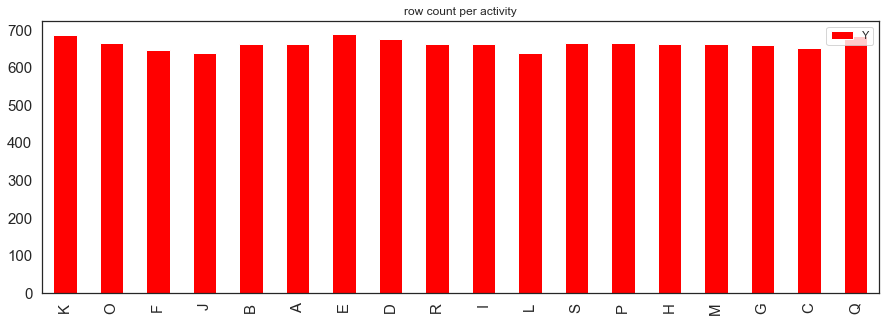

In [71]:
_ = y_train.value_counts(sort = False).plot(kind = 'bar', figsize = (15,5), color = 'red', title = 'row count per activity', legend = True, fontsize = 15)

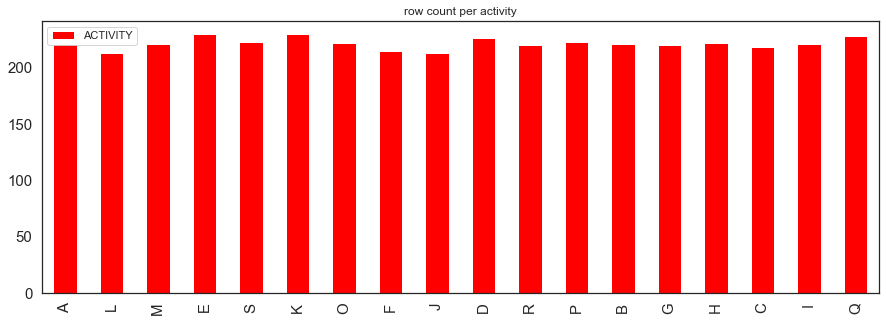

In [72]:
_ = y_test.value_counts(sort = False).plot(kind = 'bar', figsize = (15,5), color = 'red', title = 'row count per activity', legend = True, fontsize = 15)

# Decision tree classification

In [73]:
def visualize_tree(model, md=5, width=800):
    dot_data = StringIO()  
    export_graphviz(model, out_file=dot_data, feature_names=X_train.columns, max_depth=md)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
    return Image(graph.create_png(), width=width) 

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GroupKFold

my_cv = StratifiedShuffleSplit(n_splits=5, train_size=0.7, test_size=0.3)

In [75]:
dt_classifier = DecisionTreeClassifier()

In [76]:
my_param_grid = {'min_samples_leaf': [6, 10, 20, 40],
                 'min_weight_fraction_leaf': [0.01, 0.02, 0.05],
                 'criterion': ['entropy'],
                 'min_impurity_decrease': [1e-2, 7e-3]}

In [77]:
dt_model_gs = GridSearchCV(estimator=dt_classifier, 
                           param_grid=my_param_grid, 
                           cv=my_cv, 
                           scoring='accuracy',
                           verbose = 0,
                           return_train_score = True)

In [78]:
dt_model_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.7),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'],
                         'min_impurity_decrease': [0.01, 0.007],
                         'min_samples_leaf': [6, 10, 20, 40],
                         'min_weight_fraction_leaf': [0.01, 0.02, 0.05]},
             return_train_score=True, scoring='accuracy')

In [79]:
dt_model_gs.best_params_

{'criterion': 'entropy',
 'min_impurity_decrease': 0.007,
 'min_samples_leaf': 6,
 'min_weight_fraction_leaf': 0.01}

In [80]:
dt_best_classifier = dt_model_gs.best_estimator_

In [81]:
dt_model_gs.cv_results_

{'mean_fit_time': array([1.61931796, 1.37479539, 0.93926764, 1.60547471, 1.38237262,
        1.069349  , 1.86318183, 1.36722789, 0.96526937, 1.81809072,
        1.85020709, 1.27867279, 1.79693074, 1.47205048, 0.94002471,
        1.6132987 , 1.36438522, 0.93734632, 1.61080546, 1.35616231,
        0.95038209, 1.6312191 , 1.34851384, 0.93255343]),
 'std_fit_time': array([0.04598859, 0.04509522, 0.0321593 , 0.03263396, 0.07045968,
        0.23736552, 0.25732393, 0.03674564, 0.03988322, 0.25453745,
        0.17120886, 0.1659457 , 0.12365224, 0.14491224, 0.01948728,
        0.01724567, 0.06046185, 0.01948212, 0.04066665, 0.03620201,
        0.01858779, 0.02562337, 0.03337714, 0.01712349]),
 'mean_score_time': array([0.00663218, 0.00577831, 0.00626144, 0.00537353, 0.00779724,
        0.00460329, 0.00961061, 0.00220947, 0.00829825, 0.0087677 ,
        0.00710707, 0.00632873, 0.00150299, 0.00523939, 0.00452576,
        0.0043057 , 0.00453081, 0.0014008 , 0.00402622, 0.00452685,
        0.004207

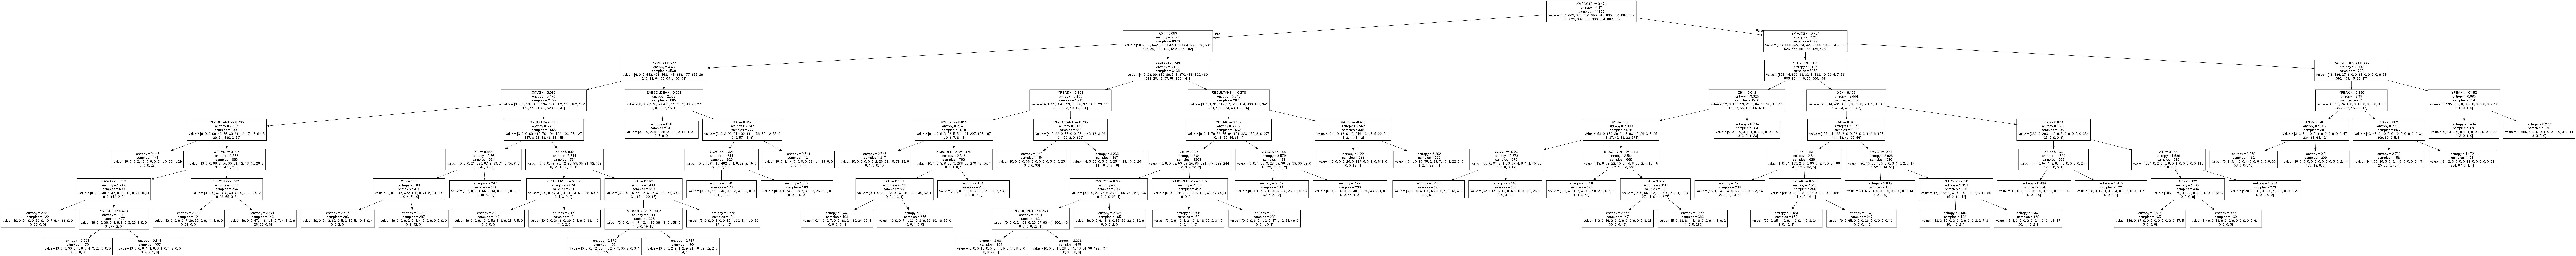

In [82]:
visualize_tree(dt_best_classifier, md=20, width=2000)

In [83]:
dt_best_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.007,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.01,
 'random_state': None,
 'splitter': 'best'}

In [84]:
dt_best_classifier.get_depth()

8

In [85]:
dt_best_classifier.get_n_leaves()

56

In [86]:
scores = cross_val_score(dt_best_classifier, X_train, y_train, cv=my_cv, scoring='accuracy')
list(scores)

[0.5376464026770775,
 0.5167317345231456,
 0.5225878416062465,
 0.520914668153932,
 0.518962632459565]

In [87]:
dt_best_classifier.score(X_train, y_train)

0.543796536434368

In [90]:
y_train_pred = dt_best_classifier.predict(X_train)


In [91]:
accuracy_score(y_true=y_train, y_pred=y_train_pred)

0.543796536434368

In [92]:
log_loss(y_train, dt_best_classifier.predict_proba(X_train))

1.3193446883775857

In [94]:
y_test

0       I
1       H
2       S
3       A
4       E
       ..
3982    F
3983    J
3984    G
3985    G
3986    I
Name: ACTIVITY, Length: 3987, dtype: object

In [95]:
y_test_pred = dt_best_classifier.predict(X_test)
print(pd.DataFrame(y_test_pred))

      0
0     S
1     H
2     S
3     C
4     D
...  ..
3982  S
3983  J
3984  G
3985  G
3986  I

[3987 rows x 1 columns]


In [96]:
cm = confusion_matrix(y_true=y_test,
                      y_pred=y_test_pred)
                      
    
cm_act = pd.DataFrame(cm,
                      index=dt_best_classifier.classes_,
                      columns=dt_best_classifier.classes_)

cm_act.columns = activity_codes_mapping.values()
cm_act.index = activity_codes_mapping.values()
cm_act

walking  jogging  stairs  sitting  standing  \
walking                        110        0      54        2         0   
jogging                         18      185       0        0         0   
stairs                          18        1      93        0         0   
sitting                          0        0       3       95        14   
standing                         0        0       2        2       116   
typing                           0        0       0       20         4   
brushing teeth                   0        0       4        0         0   
eating soup                      0        0       0        5         4   
eating chips                     0        0       1        2        29   
eating pasta                     0        0       0        0        13   
drinking from cup                0        0       0        8         9   
eating sandwich                  0        0       1        2        12   
kicking soccer ball             13        0      32        1         0   
playing catch tennis ball       16        7       4        0        10   
dribbling basket ball            6        2       7        7         3   
writing                          0        0       1       17         3   
clapping                         5        0       1        0        17   
folding clothes                  2        0       9        0        10   

                           typing  brushing teeth  eating soup  eating chips  \
walking                         0               1            3             0   
jogging                         0               0            0             0   
stairs                          0               6            0             0   
sitting                        38              14            5             9   
standing                        7              38           11            13   
typing                        138              10           12             4   
brushing teeth                  0             136           13            12   
eating soup                    14              20          114             3   
eating chips                    3              13           20            64   
eating pasta                   10              14           30             7   
drinking from cup              12               9           17            21   
eating sandwich                 8              20           28            28   
kicking soccer ball             0               2            0             0   
playing catch tennis ball       0               0            6             0   
dribbling basket ball           0               0           12             2   
writing                        22               7            5             1   
clapping                       13              15            5            16   
folding clothes                 1               2            1             7   

                           eating pasta  drinking from cup  eating sandwich  \
walking                               0                  0                0   
jogging                               0                  0                0   
stairs                                6                  0                0   
sitting                               5                 20                2   
standing                              5                 12                1   
typing                                0                  3                6   
brushing teeth                        4                  4                0   
eating soup                          38                 18                0   
eating chips                          9                 49               11   
eating pasta                         90                 25               11   
drinking from cup                     8                121                2   
eating sandwich                      16                 66                9   
kicking soccer ball                  11                  2              

In [97]:
accuracy_per_activity = pd.DataFrame([cm_act.iloc[i][i]/np.sum(cm_act.iloc[i]) for i in range(18)],index=activity_codes_mapping.values())
accuracy_per_activity

0
walking                    0.497738
jogging                    0.837104
stairs                     0.426606
sitting                    0.420354
standing                   0.504348
typing                     0.641860
brushing teeth             0.618182
eating soup                0.513514
eating chips               0.289593
eating pasta               0.422535
drinking from cup          0.526087
eating sandwich            0.042254
kicking soccer ball        0.683258
playing catch tennis ball  0.518018
dribbling basket ball      0.475336
writing                    0.728070
clapping                   0.490909
folding clothes            0.726457

In [98]:
print(classification_report(y_true=y_test,
                            y_pred=y_test_pred))

              precision    recall  f1-score   support

           A       0.59      0.50      0.54       221
           B       0.95      0.84      0.89       221
           C       0.44      0.43      0.43       218
           D       0.59      0.42      0.49       226
           E       0.48      0.50      0.49       230
           F       0.52      0.64      0.57       215
           G       0.44      0.62      0.52       220
           H       0.40      0.51      0.45       222
           I       0.34      0.29      0.31       221
           J       0.43      0.42      0.43       213
           K       0.36      0.53      0.43       230
           L       0.21      0.04      0.07       213
           M       0.55      0.68      0.61       221
           O       0.64      0.52      0.57       222
           P       0.55      0.48      0.51       223
           Q       0.76      0.73      0.74       228
           R       0.56      0.49      0.52       220
           S       0.54    

In [99]:
accuracy_score(y_true=y_test, y_pred=y_test_pred)

0.5214446952595937

# random forest classification 

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.ensemble import RandomForestClassifier

In [101]:
rf_classifier = RandomForestClassifier(**dt_model_gs.best_params_)

In [102]:
my_param_grid = {'bootstrap': [True], 
                 'n_estimators': [50, 100, 200], 
                 'oob_score': [True, False], 
                 'warm_start': [True, False]}

In [106]:
rf_model_gs = GridSearchCV(estimator = rf_classifier, 
                           param_grid = my_param_grid, 
                           scoring = 'accuracy',
                           cv = my_cv)

In [108]:
rf_model_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.7),
             estimator=RandomForestClassifier(criterion='entropy',
                                              min_impurity_decrease=0.007,
                                              min_samples_leaf=6,
                                              min_weight_fraction_leaf=0.01),
             param_grid={'bootstrap': [True], 'n_estimators': [50, 100, 200],
                         'oob_score': [True, False],
                         'warm_start': [True, False]},
             scoring='accuracy')

In [110]:
rf_best_classifier = rf_model_gs.best_estimator_

In [111]:
rf_model_gs.cv_results_

{'mean_fit_time': array([ 6.77271838,  6.79818106,  6.79401236,  6.80522957, 14.11065454,
        14.40670557, 13.23323975, 12.57153935, 25.31126871, 26.71503949,
        27.19206066, 27.63039265]),
 'std_fit_time': array([0.40511428, 0.21202271, 0.45884989, 0.11641024, 0.96784845,
        0.73321932, 0.59737743, 0.14721527, 0.09359104, 1.15148857,
        0.34047036, 0.60615379]),
 'mean_score_time': array([0.05103507, 0.04933648, 0.05453033, 0.03918729, 0.09181213,
        0.09489546, 0.0691936 , 0.06762662, 0.13263373, 0.14939475,
        0.14857965, 0.14698658]),
 'std_score_time': array([0.01119084, 0.00973767, 0.01475509, 0.00101983, 0.02221673,
        0.01901197, 0.00310325, 0.00107996, 0.00163305, 0.01234072,
        0.00396545, 0.0057681 ]),
 'param_bootstrap': masked_array(data=[True, True, True, True, True, True, True, True, True,
                    True, True, True],
              mask=[False, False, False, False, False, False, False, False,
                    False, Fal

In [112]:
rf_best_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.007,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.01,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [113]:
scores = cross_val_score(rf_best_classifier, X_train, y_train, cv=my_cv, scoring='accuracy')
list(scores)

[0.6508644729503625,
 0.6533742331288344,
 0.6536530953708868,
 0.6611823759063022,
 0.6622978248745119]

In [114]:
y_train_pred = rf_best_classifier.predict(X_train)


In [115]:
accuracy_score(y_true=y_train, y_pred=y_train_pred)

0.6789927214925123

In [116]:
y_test

0       I
1       H
2       S
3       A
4       E
       ..
3982    F
3983    J
3984    G
3985    G
3986    I
Name: ACTIVITY, Length: 3987, dtype: object

In [117]:
y_test_pred = rf_best_classifier.predict(X_test)
print(pd.DataFrame(y_test_pred))

      0
0     C
1     H
2     S
3     C
4     D
...  ..
3982  S
3983  H
3984  G
3985  G
3986  I

[3987 rows x 1 columns]


In [118]:
cm = confusion_matrix(y_true=y_test,
                      y_pred=y_test_pred)
#                      y_pred=y_test_pred, normalize = 'true')
    
cm_act = pd.DataFrame(cm,
                      index=rf_best_classifier.classes_,
                      columns=rf_best_classifier.classes_)

cm_act.columns = activity_codes_mapping.values()
cm_act.index = activity_codes_mapping.values()
cm_act

walking  jogging  stairs  sitting  standing  \
walking                        144       12      34        0         0   
jogging                          1      211       1        0         0   
stairs                          25        8     132        0         0   
sitting                          0        0       2      125        18   
standing                         0        0       0        9       154   
typing                           0        0       0        7         0   
brushing teeth                   0        4       5        0         6   
eating soup                      0        0       0        0         5   
eating chips                     0        0       3        2        13   
eating pasta                     0        0       0        3         2   
drinking from cup                0        0       0        3        10   
eating sandwich                  1        0       3        5        10   
kicking soccer ball              6        3      17        0         0   
playing catch tennis ball        1       23       2        0         3   
dribbling basket ball            0        3       2        2         1   
writing                          0        0       0        5         0   
clapping                         0        1       0        0        11   
folding clothes                  0        1       2        0         3   

                           typing  brushing teeth  eating soup  eating chips  \
walking                         0               4            2             0   
jogging                         0               0            0             0   
stairs                          0               1            1             0   
sitting                        23               3            4            15   
standing                       13               6            7             7   
typing                        170               0            0             9   
brushing teeth                  1             168           10            13   
eating soup                     4               8          114            21   
eating chips                    9              12           14            99   
eating pasta                    9               5           35            12   
drinking from cup               6               2            8            19   
eating sandwich                 8              17           24            32   
kicking soccer ball             0              13            2             0   
playing catch tennis ball       0               6            5             0   
dribbling basket ball           0              15           11             0   
writing                        23               1            0             1   
clapping                        0               7            6             1   
folding clothes                 0               8            3             2   

                           eating pasta  drinking from cup  eating sandwich  \
walking                               0                  0                0   
jogging                               0                  0                0   
stairs                                0                  0                0   
sitting                               8                  3                1   
standing                              2                  9                1   
typing                                4                  0                0   
brushing teeth                        0                  0                0   
eating soup                          25                 27                0   
eating chips                         20                 31                3   
eating pasta                        127                  8                0   
drinking from cup                    10                151                1   
eating sandwich                      27                 50               26   
kicking soccer ball                   0                  1              

In [119]:
accuracy_per_activity = pd.DataFrame([cm_act.iloc[i][i]/np.sum(cm_act.iloc[i]) for i in range(18)],index=activity_codes_mapping.values())
accuracy_per_activity

0
walking                    0.651584
jogging                    0.954751
stairs                     0.605505
sitting                    0.553097
standing                   0.669565
typing                     0.790698
brushing teeth             0.763636
eating soup                0.513514
eating chips               0.447964
eating pasta               0.596244
drinking from cup          0.656522
eating sandwich            0.122066
kicking soccer ball        0.769231
playing catch tennis ball  0.590090
dribbling basket ball      0.632287
writing                    0.820175
clapping                   0.768182
folding clothes            0.852018

In [120]:
print(classification_report(y_true=y_test,
                            y_pred=y_test_pred))

              precision    recall  f1-score   support

           A       0.81      0.65      0.72       221
           B       0.79      0.95      0.87       221
           C       0.65      0.61      0.63       218
           D       0.78      0.55      0.65       226
           E       0.65      0.67      0.66       230
           F       0.64      0.79      0.71       215
           G       0.61      0.76      0.68       220
           H       0.46      0.51      0.49       222
           I       0.43      0.45      0.44       221
           J       0.55      0.60      0.57       213
           K       0.53      0.66      0.59       230
           L       0.74      0.12      0.21       213
           M       0.73      0.77      0.75       221
           O       0.77      0.59      0.67       222
           P       0.83      0.63      0.72       223
           Q       0.68      0.82      0.75       228
           R       0.86      0.77      0.81       220
           S       0.57    

In [121]:
accuracy_score(y_true=y_test, y_pred=y_test_pred)

0.654376724354151

# logistic regression model

In [122]:
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings('ignore')


In [123]:
lr_classifier = LogisticRegression(verbose = 0)

In [124]:
my_param_grid = {'C': [10, 50, 100, 200]}

In [125]:
lr_model_gs = GridSearchCV(estimator=lr_classifier, 
                           param_grid=my_param_grid, 
                           cv=my_cv, 
                           scoring = 'accuracy')

In [126]:
lr_model_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.7),
             estimator=LogisticRegression(),
             param_grid={'C': [10, 50, 100, 200]}, scoring='accuracy')

In [127]:
lr_best_classifier = lr_model_gs.best_estimator_

In [128]:
lr_model_gs.cv_results_

{'mean_fit_time': array([1.27300053, 1.28784494, 1.23844228, 1.2877193 ]),
 'std_fit_time': array([0.06386608, 0.04163571, 0.02522495, 0.03607711]),
 'mean_score_time': array([0.01412883, 0.0191946 , 0.01249919, 0.01563044]),
 'std_score_time': array([2.43090181e-03, 6.06277325e-03, 6.24959525e-03, 1.46532610e-05]),
 'param_C': masked_array(data=[10, 50, 100, 200],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 10}, {'C': 50}, {'C': 100}, {'C': 200}],
 'split0_test_score': array([0.63106525, 0.63106525, 0.6299498 , 0.62967094]),
 'split1_test_score': array([0.6263246 , 0.6299498 , 0.6299498 , 0.62604573]),
 'split2_test_score': array([0.61517011, 0.61656442, 0.62242052, 0.61935304]),
 'split3_test_score': array([0.63720022, 0.63831567, 0.63859453, 0.63524819]),
 'split4_test_score': array([0.63469046, 0.63134412, 0.63524819, 0.63245956]),
 'mean_test_score': array([0.62889013, 0.62944785, 0.63123257, 0.62855549]),


In [129]:
lr_best_classifier.get_params()

{'C': 100,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [130]:
scores = cross_val_score(lr_best_classifier, X_train, y_train, cv=my_cv, scoring='accuracy')
list(scores)

[0.624372559955382,
 0.6307863915225879,
 0.6257668711656442,
 0.634132738427217,
 0.6084774121583938]

In [131]:
y_train_pred=lr_best_classifier.predict(X_train)


In [132]:
accuracy_score(y_true=y_train, y_pred=y_train_pred)

0.6433531331046599

In [133]:
y_test

0       I
1       H
2       S
3       A
4       E
       ..
3982    F
3983    J
3984    G
3985    G
3986    I
Name: ACTIVITY, Length: 3987, dtype: object

In [134]:
y_test_pred = lr_best_classifier.predict(X_test)
print(pd.DataFrame(y_test_pred))

      0
0     I
1     L
2     S
3     A
4     D
...  ..
3982  S
3983  J
3984  G
3985  L
3986  L

[3987 rows x 1 columns]


In [135]:
cm = confusion_matrix(y_true=y_test,
                      y_pred=y_test_pred)
 
    
cm_act = pd.DataFrame(cm,
                      index=lr_best_classifier.classes_,
                      columns=lr_best_classifier.classes_)

cm_act.columns = activity_codes_mapping.values()
cm_act.index = activity_codes_mapping.values()
cm_act

walking  jogging  stairs  sitting  standing  \
walking                        148        1      32        0         1   
jogging                          2      213       1        0         0   
stairs                          35        1     120        0         0   
sitting                          0        0       3      129         5   
standing                         0        0       1       11       169   
typing                           0        0       0       18         1   
brushing teeth                   1        0       3        0         4   
eating soup                      1        0       1        4         7   
eating chips                     2        0       3        7        13   
eating pasta                     0        1       0        4         2   
drinking from cup                0        0       0        4        11   
eating sandwich                  0        1       0       11         5   
kicking soccer ball              9        1      17        0         1   
playing catch tennis ball        7        5       4        0         0   
dribbling basket ball            5        0      13        0         2   
writing                          0        0       0        4         1   
clapping                         3        0       2        4         9   
folding clothes                  6        0       3        0         1   

                           typing  brushing teeth  eating soup  eating chips  \
walking                         1               1            0             2   
jogging                         0               0            0             0   
stairs                          0               1            0             5   
sitting                        20               2            1            10   
standing                        2               0            4             5   
typing                        153               2            1             1   
brushing teeth                  2             160            4            11   
eating soup                     1               6           96             7   
eating chips                    5               9           15            95   
eating pasta                    7              13           23            12   
drinking from cup               5               2           10            24   
eating sandwich                 8               8           23            29   
kicking soccer ball             0               4            0             2   
playing catch tennis ball       1               1            0             0   
dribbling basket ball           0              10            5             0   
writing                        14               2            4             1   
clapping                        3               6            2            12   
folding clothes                 2               2           10             2   

                           eating pasta  drinking from cup  eating sandwich  \
walking                               0                  0                0   
jogging                               0                  0                0   
stairs                                1                  0                0   
sitting                               7                  8                9   
standing                              2                  4                3   
typing                                7                  1                0   
brushing teeth                        4                  5                3   
eating soup                          60                  6                6   
eating chips                         15                 16               22   
eating pasta                        120                  5                3   
drinking from cup                     8                120               18   
eating sandwich                      21                 30               53   
kicking soccer ball                   2                  0              

In [136]:
accuracy_per_activity = pd.DataFrame([cm_act.iloc[i][i]/np.sum(cm_act.iloc[i]) for i in range(18)],index=activity_codes_mapping.values())
accuracy_per_activity

0
walking                    0.669683
jogging                    0.963801
stairs                     0.550459
sitting                    0.570796
standing                   0.734783
typing                     0.711628
brushing teeth             0.727273
eating soup                0.432432
eating chips               0.429864
eating pasta               0.563380
drinking from cup          0.521739
eating sandwich            0.248826
kicking soccer ball        0.737557
playing catch tennis ball  0.657658
dribbling basket ball      0.654709
writing                    0.789474
clapping                   0.718182
folding clothes            0.699552

In [137]:
print(classification_report(y_true=y_test,
                            y_pred=y_test_pred))

              precision    recall  f1-score   support

           A       0.68      0.67      0.67       221
           B       0.96      0.96      0.96       221
           C       0.59      0.55      0.57       218
           D       0.66      0.57      0.61       226
           E       0.73      0.73      0.73       230
           F       0.68      0.71      0.70       215
           G       0.70      0.73      0.71       220
           H       0.48      0.43      0.46       222
           I       0.44      0.43      0.43       221
           J       0.48      0.56      0.52       213
           K       0.57      0.52      0.54       230
           L       0.45      0.25      0.32       213
           M       0.70      0.74      0.72       221
           O       0.61      0.66      0.63       222
           P       0.71      0.65      0.68       223
           Q       0.59      0.79      0.68       228
           R       0.72      0.72      0.72       220
           S       0.60    

In [138]:
accuracy_score(y_true=y_test, y_pred=y_test_pred)

0.6333082518184099

# KNN

In [144]:
from sklearn.neighbors import KNeighborsClassifier
knn_model_gs = GridSearchCV(estimator = knn_classifier, 
                            param_grid = my_param_grid,
                            cv = my_cv, 
                            scoring ='accuracy')

In [145]:
knn_classifier = KNeighborsClassifier()

In [146]:
my_param_grid = {'n_neighbors': [5, 10, 20], 'leaf_size': [20, 30, 40]}

In [147]:
knn_model_gs = GridSearchCV(estimator = knn_classifier, 
                            param_grid = my_param_grid,
                            cv = my_cv, 
                            scoring ='accuracy')


In [148]:
knn_model_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.7),
             estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [20, 30, 40], 'n_neighbors': [5, 10, 20]},
             scoring='accuracy')

In [149]:
knn_best_classifier = knn_model_gs.best_estimator_

In [150]:
print(knn_model_gs.best_params_)

{'leaf_size': 20, 'n_neighbors': 5}


In [151]:
knn_model_gs.cv_results_

{'mean_fit_time': array([0.03842044, 0.03126078, 0.03750234, 0.03557682, 0.03656244,
        0.03751955, 0.03129296, 0.04038863, 0.04170437]),
 'std_fit_time': array([7.65579103e-03, 1.03961437e-05, 7.65421177e-03, 6.10135477e-03,
        6.21108552e-03, 7.63441680e-03, 8.77255192e-05, 7.45944475e-03,
        1.30516196e-02]),
 'mean_score_time': array([0.48647165, 0.48095179, 0.49787736, 0.46269732, 0.46836872,
        0.49096036, 0.46173854, 0.47062349, 0.54242873]),
 'std_score_time': array([0.06455991, 0.01608087, 0.00903537, 0.00853582, 0.00335698,
        0.00576105, 0.00341468, 0.00811931, 0.07101452]),
 'param_leaf_size': masked_array(data=[20, 20, 20, 30, 30, 30, 40, 40, 40],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_neighbors': masked_array(data=[5, 10, 20, 5, 10, 20, 5, 10, 20],
              mask=[False, False, False, False, False, False, False, False,

In [152]:
knn_best_classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 20,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [153]:
scores = cross_val_score(knn_best_classifier, X_train, y_train, cv=my_cv, scoring='accuracy')
list(scores)

[0.7836029001673174,
 0.7852760736196319,
 0.7774679308421639,
 0.7805354155047407,
 0.7757947573898494]

In [154]:
y_train_pred=knn_best_classifier.predict(X_train)


In [155]:
accuracy_score(y_true=y_train, y_pred=y_train_pred)

0.8586965615326696

In [156]:
y_test_pred = knn_best_classifier.predict(X_test)


In [157]:
cm = confusion_matrix(y_true=y_test,
                      y_pred=y_test_pred)
    
cm_act = pd.DataFrame(cm,
                      index = knn_best_classifier.classes_,
                      columns = knn_best_classifier.classes_)

cm_act.columns = activity_codes_mapping.values()
cm_act.index = activity_codes_mapping.values()
cm_act

walking  jogging  stairs  sitting  standing  \
walking                        191        0       9        0         0   
jogging                          1      214       1        0         0   
stairs                          14        4     155        0         0   
sitting                          0        1       4      151         5   
standing                         3        0       1        6       172   
typing                           0        0       0        6         0   
brushing teeth                   0        0       0        2         5   
eating soup                      0        1       0        1         1   
eating chips                     1        0       3        2         2   
eating pasta                     1        0       1        6         2   
drinking from cup                1        0       0        3         2   
eating sandwich                  0        0       1        9         4   
kicking soccer ball              8        1      15        0         0   
playing catch tennis ball        4        5       0        0         1   
dribbling basket ball            0        0       1        0         2   
writing                          1        0       1        2         0   
clapping                         0        0       0        2         7   
folding clothes                  0        0       1        0         1   

                           typing  brushing teeth  eating soup  eating chips  \
walking                         1               1            0             0   
jogging                         0               0            0             0   
stairs                          0               1            0             1   
sitting                        20               1            2            10   
standing                        2               6            4             0   
typing                        198               1            1             1   
brushing teeth                  0             191            2             6   
eating soup                     3               6          158             6   
eating chips                    4              15            9           140   
eating pasta                    1               3           24            11   
drinking from cup               1               7            8            19   
eating sandwich                 6               6           24            27   
kicking soccer ball             0               1            0             1   
playing catch tennis ball       0               0            1             0   
dribbling basket ball           0               0            2             0   
writing                         8               0            3             0   
clapping                        0               1            0             5   
folding clothes                 0               2            1             0   

                           eating pasta  drinking from cup  eating sandwich  \
walking                               0                  0                0   
jogging                               0                  0                0   
stairs                                1                  0                0   
sitting                               3                  9                4   
standing                              1                  3                4   
typing                                0                  0                1   
brushing teeth                        2                  0                4   
eating soup                          26                  5                5   
eating chips                         14                 11               12   
eating pasta                        146                  3                1   
drinking from cup                     8                161                9   
eating sandwich                      17                 33               76   
kicking soccer ball                   1                  0              

In [158]:
accuracy_per_activity = pd.DataFrame([cm_act.iloc[i][i]/np.sum(cm_act.iloc[i]) for i in range(18)],index=activity_codes_mapping.values())
accuracy_per_activity

0
walking                    0.864253
jogging                    0.968326
stairs                     0.711009
sitting                    0.668142
standing                   0.747826
typing                     0.920930
brushing teeth             0.868182
eating soup                0.711712
eating chips               0.633484
eating pasta               0.685446
drinking from cup          0.700000
eating sandwich            0.356808
kicking soccer ball        0.823529
playing catch tennis ball  0.873874
dribbling basket ball      0.887892
writing                    0.877193
clapping                   0.886364
folding clothes            0.869955

In [159]:
print(classification_report(y_true=y_test,
                            y_pred=y_test_pred))

              precision    recall  f1-score   support

           A       0.85      0.86      0.86       221
           B       0.95      0.97      0.96       221
           C       0.80      0.71      0.75       218
           D       0.79      0.67      0.73       226
           E       0.84      0.75      0.79       230
           F       0.81      0.92      0.86       215
           G       0.79      0.87      0.83       220
           H       0.66      0.71      0.69       222
           I       0.62      0.63      0.63       221
           J       0.64      0.69      0.66       213
           K       0.71      0.70      0.70       230
           L       0.62      0.36      0.45       213
           M       0.71      0.82      0.76       221
           O       0.87      0.87      0.87       222
           P       0.89      0.89      0.89       223
           Q       0.87      0.88      0.87       228
           R       0.92      0.89      0.90       220
           S       0.71    

In [160]:
accuracy_score(y_true = y_test, y_pred = y_test_pred)

0.7815400050163029

# SVM

In [162]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_classifier = SVC()

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 10]}

grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_svm_classifier = grid_search.best_estimator_

best_svm_classifier.fit(X_train, y_train)

y_pred = best_svm_classifier.predict(X_test)


In [163]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8354652621018309


In [1]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


NameError: name 'y_test' is not defined